# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
from pyuvdata import uvutils
from hera_qm import ant_metrics
import hera_cal
from copy import deepcopy
from scipy.signal import medfilt2d

from matplotlib.colors import SymLogNorm
import sys
import os
from hera_qm import xrfi as xrfi
import numpy.ma as ma
from glob import glob
import math

# Initial Set Up / Antenna Modification

In [2]:

data_file_list = ['/data6/HERA/data/2458042/zen.2458042.12552.xx.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.yy.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.yx.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.xy.HH.uv']

m_data_file_list = ['/data6/HERA/HERA_imaging/redundancy_analysis/zen.2458042.12552.xx.HH.uv.m1','/data6/HERA/HERA_imaging/redundancy_analysis/zen.2458042.12552.yy.HH.uv.m1','/data6/HERA/HERA_imaging/redundancy_analysis/zen.2458042.12552.yx.HH.uv.m1','/data6/HERA/HERA_imaging/redundancy_analysis/zen.2458042.12552.xy.HH.uv.m1']

uv = UVData()


In [3]:

uv.read_miriad(data_file_list)


Combined polarizations are not evenly spaced. This will make it impossible to write this data out to some file types.


In [16]:

print np.where(1 == uv.ant_1_array)[0]
print np.where(11 == uv.ant_1_array)[0]

print np.where(1 == uv.ant_2_array)[0]
print np.where(11 == uv.ant_2_array)[0]


[   47    48    49 ..., 66642 66643 66644]
[  138   139   140 ..., 66731 66732 66733]
[    1    47  1129  1175  2257  2303  3385  3431  4513  4559  5641  5687
  6769  6815  7897  7943  9025  9071 10153 10199 11281 11327 12409 12455
 13537 13583 14665 14711 15793 15839 16921 16967 18049 18095 19177 19223
 20305 20351 21433 21479 22561 22607 23689 23735 24817 24863 25945 25991
 27073 27119 28201 28247 29329 29375 30457 30503 31585 31631 32713 32759
 33841 33887 34969 35015 36097 36143 37225 37271 38353 38399 39481 39527
 40609 40655 41737 41783 42865 42911 43993 44039 45121 45167 46249 46295
 47377 47423 48505 48551 49633 49679 50761 50807 51889 51935 53017 53063
 54145 54191 55273 55319 56401 56447 57529 57575 58657 58703 59785 59831
 60913 60959 62041 62087 63169 63215 64297 64343 65425 65471 66553 66599]
[    3    49    94   138  1131  1177  1222  1266  2259  2305  2350  2394
  3387  3433  3478  3522  4515  4561  4606  4650  5643  5689  5734  5778
  6771  6817  6862  6906  7899  7945 

In [17]:

# This process switches antennas 1 & 11 in every baseline at every time

for file_name, output_file_name in zip(data_file_list,m_data_file_list):
    
    uv.read_miriad(file_name)

    ant1 = 1
    ant2 = 11

    ind1 = np.where(ant1 == uv.ant_1_array)[0]

    ind2 = np.where(ant2 == uv.ant_1_array)[0]

    uv.ant_1_array[ind1] = ant2

    uv.ant_1_array[ind2] = ant1

    ind1 = np.where(ant1 == uv.ant_2_array)[0]

    ind2 = np.where(ant2 == uv.ant_2_array)[0]

    uv.ant_2_array[ind1] = ant2

    uv.ant_2_array[ind2] = ant1
    
    uv.write_miriad(output_file_name,clobber=True)


In [18]:

print np.where(1 == uv.ant_1_array)[0]
print np.where(11 == uv.ant_1_array)[0]

print np.where(1 == uv.ant_2_array)[0]
print np.where(11 == uv.ant_2_array)[0]


[  138   139   140 ..., 66731 66732 66733]
[   47    48    49 ..., 66642 66643 66644]
[    3    49    94   138  1131  1177  1222  1266  2259  2305  2350  2394
  3387  3433  3478  3522  4515  4561  4606  4650  5643  5689  5734  5778
  6771  6817  6862  6906  7899  7945  7990  8034  9027  9073  9118  9162
 10155 10201 10246 10290 11283 11329 11374 11418 12411 12457 12502 12546
 13539 13585 13630 13674 14667 14713 14758 14802 15795 15841 15886 15930
 16923 16969 17014 17058 18051 18097 18142 18186 19179 19225 19270 19314
 20307 20353 20398 20442 21435 21481 21526 21570 22563 22609 22654 22698
 23691 23737 23782 23826 24819 24865 24910 24954 25947 25993 26038 26082
 27075 27121 27166 27210 28203 28249 28294 28338 29331 29377 29422 29466
 30459 30505 30550 30594 31587 31633 31678 31722 32715 32761 32806 32850
 33843 33889 33934 33978 34971 35017 35062 35106 36099 36145 36190 36234
 37227 37273 37318 37362 38355 38401 38446 38490 39483 39529 39574 39618
 40611 40657 40702 40746 41739 41785 4

In [45]:
uv.read_miriad(m_data_file_list)

In [4]:

aa = hera_cal.utils.get_aa_from_uv(uv)

info = hera_cal.omni.aa_to_info(aa)

reds = info.get_reds()


In [5]:

am = ant_metrics.Antenna_Metrics(m_data_file_list, reds, fileformat = 'miriad')
#am = ant_metrics.Antenna_Metrics(data_file_list, reds, fileformat = 'miriad')


# Redundancy Simulation

In [29]:

bases = []

lst = uv.get_antpairpols()

for i in range(uv.Nbls):
    
    pair = lst[4*i]
    
    bases.append((pair[0],pair[1]))
    
print bases


[(0, 0), (0, 1), (0, 2), (0, 11), (0, 12), (0, 13), (0, 14), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 98), (0, 120), (0, 121), (0, 122), (0, 123), (0, 124), (0, 141), (0, 142), (0, 143), (1, 1), (1, 2), (1, 11), (1, 12), (1, 13), (1, 14), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 98), (1, 120), (1, 121), (1, 122), (1, 123), (1, 124), (1, 141), (1, 142), (1, 143), (2, 2), (2, 11), (2, 12), (2, 13), (2, 14), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 36), (2, 37), (2, 38), (2, 39), (2, 40), (2, 41), (2, 50),

In [30]:

nonreds = []

for i in bases:
    
    flag = 0
    
    for j in reds:
        
        for k in j:
            
            if i == k:
                
                flag = 1
                
    if flag == 0:
        
        nonreds.append(i)
        
    
print nonreds


[(0, 0), (0, 98), (0, 143), (1, 1), (1, 98), (2, 2), (2, 98), (2, 120), (2, 141), (11, 11), (12, 12), (13, 13), (13, 98), (14, 14), (14, 98), (14, 120), (23, 23), (24, 24), (25, 25), (26, 26), (26, 98), (27, 27), (27, 98), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (40, 98), (41, 41), (41, 98), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (55, 98), (65, 65), (65, 124), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (71, 98), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (87, 98), (88, 88), (88, 98), (98, 98), (98, 124), (98, 143), (120, 120), (121, 121), (122, 122), (123, 123), (124, 124), (141, 141), (142, 142), (143, 143)]


In [44]:
v = deepcopy (uv)


In [ ]:

def signal(amp,width,baseline):
    
    ant_1 = baseline[0]
    
    ant_2 = baseline[1]
    
    if (ant_1 == ant_2):
        
        return np.zeros((60,1024,4))
    
    ant_1_ind = np.where(v.antenna_numbers==ant_1)
    
    ant_2_ind = np.where(v.antenna_numbers==ant_2)
    
    dist = np.linalg.norm(v.antenna_positions[ant_1_ind]-v.antenna_positions[ant_2_ind])
    
    c = float(3e8)
    
    B = float(v.freq_array[0][-1]-v.freq_array[0][1])
    
    del_tau = 1. / B
    
    tau = (c * del_tau) / (dist * np.cos(15*np.pi / 180))
    
    temp = np.zeros((60,1024,4),dtype = complex)
    
    T = v.Ntimes*10
    
    del_nu = 1. / T
    
    earth_rot = 1. / 86164.09053
    
    freq_naught = np.median(v.freq_array[0])
    
    nu = earth_rot * dist * freq_naught / c
    
    temp = np.random.normal(amp,width,(60,1024,4)) * np.exp(nu_rang*(del_nu/nu)) * np.sinc(tau_rang*tau)
    
    result = np.zeros((60,1024,4),dtype = complex)
    
    result[:,:,0] = np.fft.fftn(temp[:,:,0])
    
    result[:,:,1] = np.fft.fftn(temp[:,:,1])
    
    result[:,:,2] = np.fft.fftn(temp[:,:,2])
    
    result[:,:,3] = np.fft.fftn(temp[:,:,3])
    
    return result
    

In [ ]:

def noise(amp,width):
    
    real = np.random.normal(amp,width,(60,1024,4))
    
    imag = np.random.normal(amp,width,(60,1024,4))
    
    sig = np.array(real,dtype = complex)
    
    sig.imag = imag
    
    result = sig
    
    return result


In [ ]:

nu_rang = np.zeros((60,1024,4))
    
tau_rang = np.zeros((60,1024,4))
    
for i in range(v.Ntimes):
        
    nu_rang[i,:,:] = -i
        
for j in range(v.Nfreqs/2 + 1):
        
    tau_rang[:,j,:] = j
    
    if (j != 0):
        
        tau_rang[:,-j,:] = j
    

In [ ]:

new_data_array = np.zeros((67680, 1, 1024, 4),dtype = complex)

sig_data_array = np.zeros((67680, 1, 1024, 4),dtype = complex)

noi_data_array = np.zeros((67680, 1, 1024, 4),dtype = complex)

s_width = 1

s_amp = 0

i_width = 0.3

i_amp = 0

n_width = 0.5

n_amp = 0

xant = 23

x_width = 0.

x_amp = 0

for i in reds:
        
    sig = signal(s_amp,s_width,i[0])
    
    print 'working'
        
    for j in i:
        
        x_sig = 0
        
        i_sig = signal(i_amp,i_width,j)
        
        if ((j[0] == xant) or (j[1] == xant)):
            
            x_sig = signal(x_amp,x_width,j)
            
            norm_power = float(s_width**2)
            
            new_power = float(norm_power + i_width**2 + x_width**2)
            
            ratio = np.sqrt(norm_power/new_power)
            
            sigs = (sig + i_sig + x_sig) * ratio
            
        else:
            
            norm_power = float(s_width**2)
            
            new_power = float(norm_power + i_width**2)
            
            ratio = np.sqrt(norm_power/new_power)
            
            sigs = (sig + i_sig) * ratio
            
        indices = v.antpair2ind(j[0],j[1])
            
        noi = noise(n_amp,n_width)
        
        visibility = sigs + noi
            
        new_data_array[indices,0,:,:] = visibility
        
        sig_data_array[indices,0,:,:] = sig
        
        noi_data_array[indices,0,:,:] = noi
            

In [ ]:

for i in nonreds:
    
    print 'working'
    
    sig = signal(s_amp,s_width,i)
    
    i_sig = signal(i_amp,i_width,i)
    
    indices = v.antpair2ind(i[0],i[1])
            
    noi = noise(n_amp,n_width)
    
    x_sig = 0
    
    if ((i[0] == xant) or (i[1] == xant)):
            
        x_sig = signal(x_amp,x_width,i)
            
        norm_power = float(s_width**2)
            
        new_power = float(norm_power + i_width**2 + x_width**2)
            
        ratio = np.sqrt(norm_power/new_power)
        
        sigs = (sig + i_sig + x_sig) * ratio
        
    else:
        
        norm_power = float(s_width**2)
            
        new_power = float(norm_power + i_width**2)
            
        ratio = np.sqrt(norm_power/new_power)        
        
        sigs = (sig + i_sig) * ratio
            
    visibility = sigs + noi
            
    new_data_array[indices,0,:,:] = visibility
    
    sig_data_array[indices,0,:,:] = sig
        
    noi_data_array[indices,0,:,:] = noi
    

In [ ]:

print new_data_array


# Simulation/Real Data Waterfall Analysis

In [ ]:
v.data_array = new_data_array

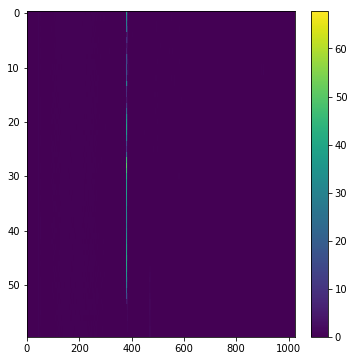

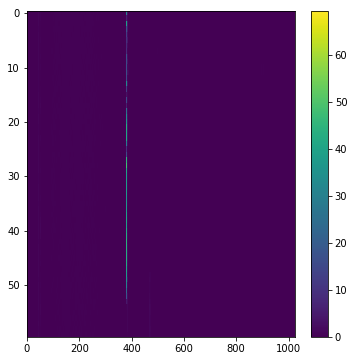

In [32]:

data = v.get_data(23,71,'xx')

plt.figure(figsize=(6,6))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()



data = v.get_data(36,87,'xx')

plt.figure(figsize=(6,6))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()

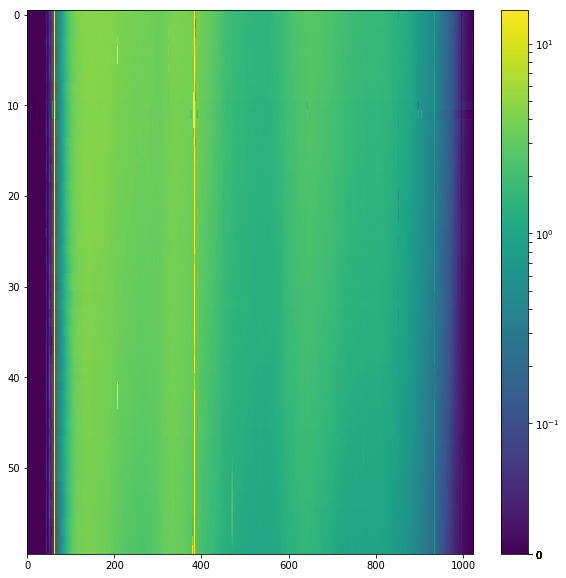

In [62]:

#Pre Swap

data = v.get_data(0,1,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=15,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


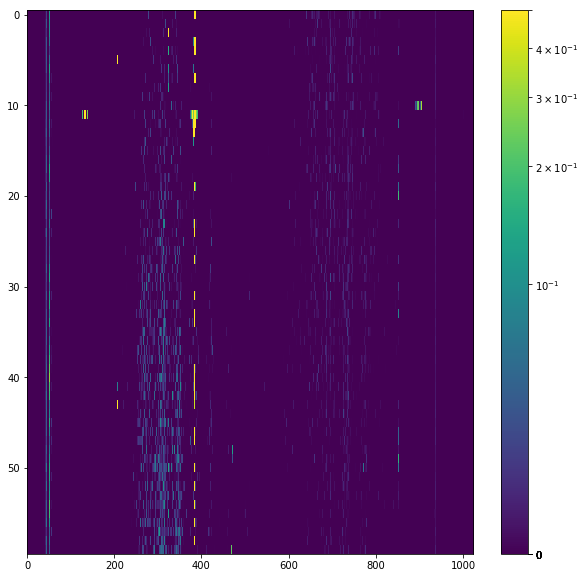

In [10]:

#Post Swap

data = uv.get_data(1,85,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.real(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=0.5,linthresh=.1))
#plt.imshow(np.real(data), aspect='auto')
plt.colorbar()
plt.show()


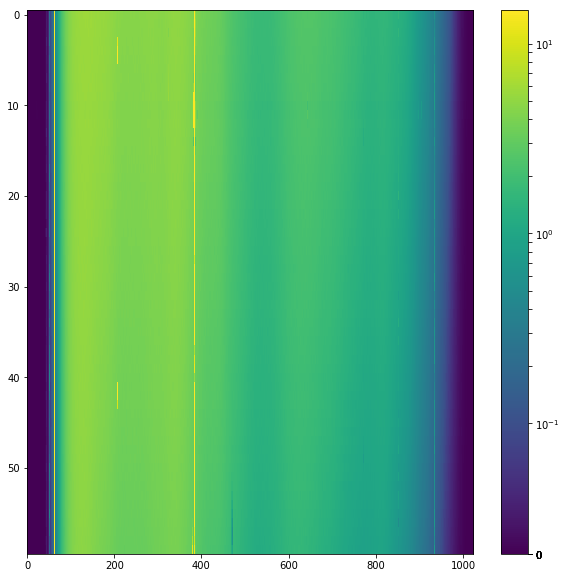

In [89]:

# Pre Swap

data = v.get_data(0,11,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=15,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


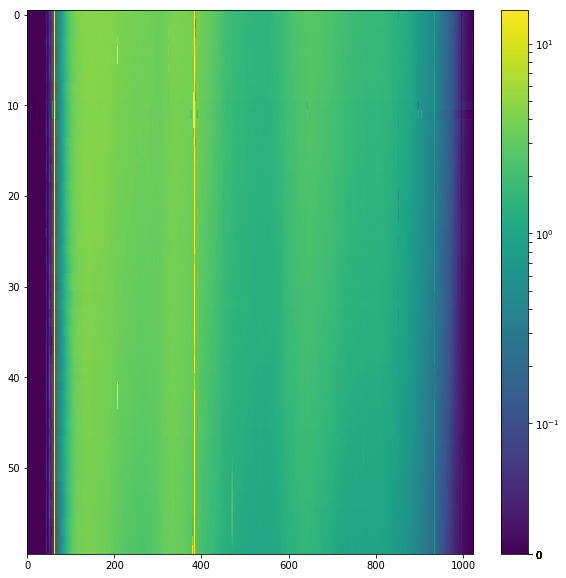

In [66]:

#Post Swap

data = uv.get_data(0,11,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=15,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


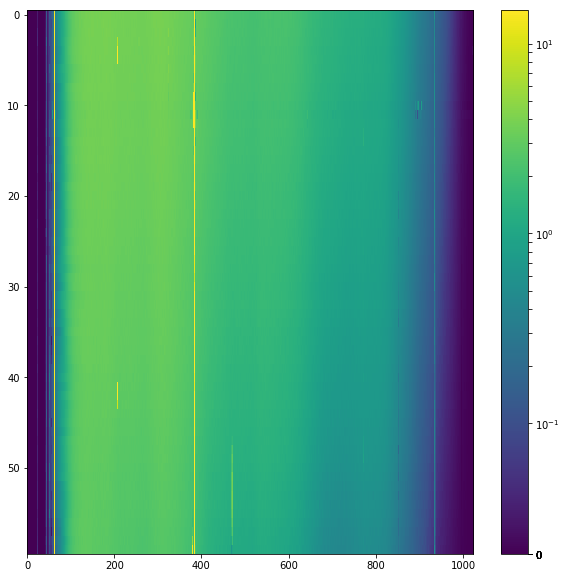

In [67]:

# Pre Swap

data = v.get_data(1,2,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=15,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


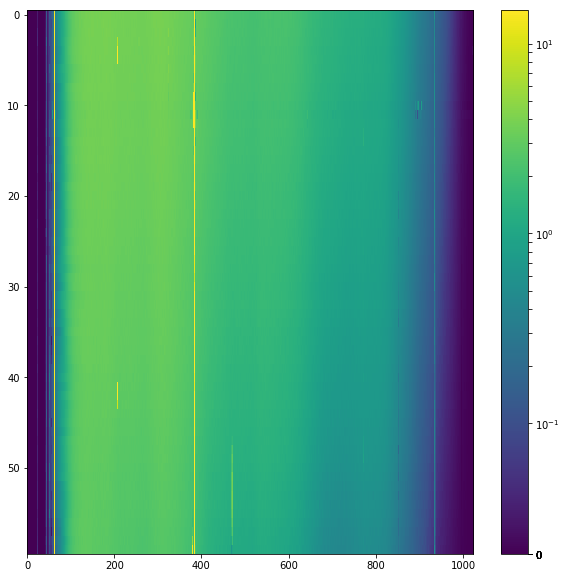

In [68]:

# Post Swap

data = uv.get_data(11,2,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=15,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


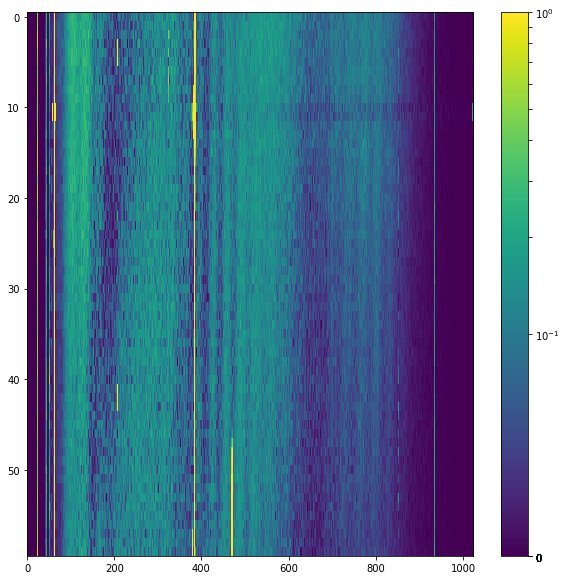

In [73]:

#Pre Swap

data = v.get_data(1,121,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


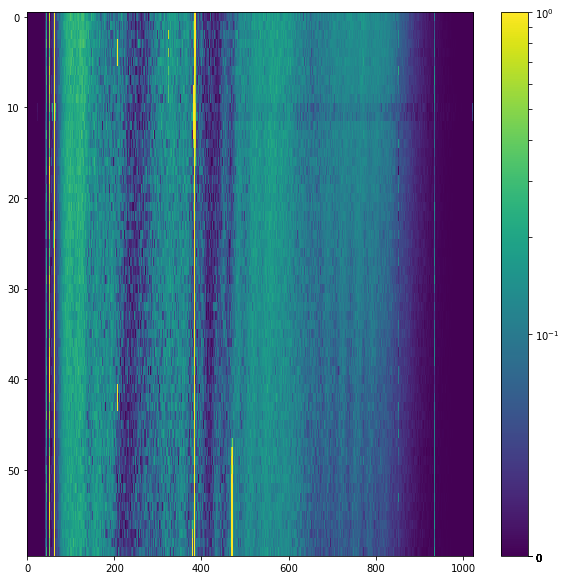

In [74]:

#Pre Swap

data = v.get_data(11,121,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


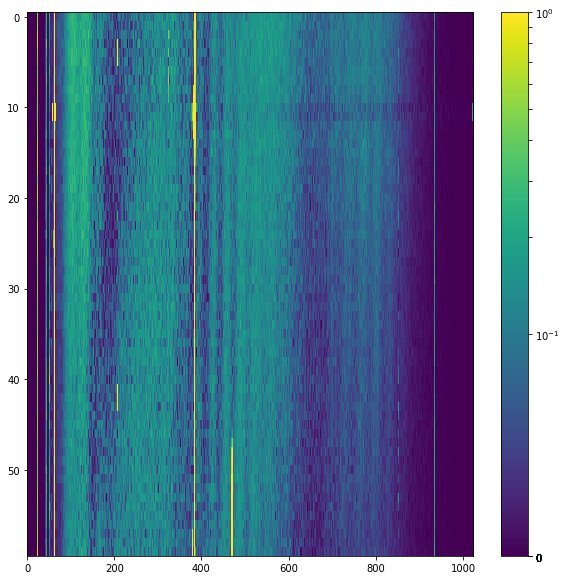

In [76]:

#Post Swap

data = uv.get_data(11,121,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


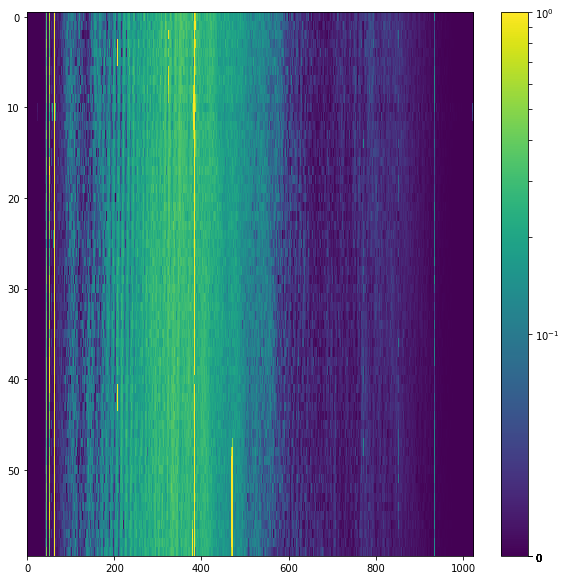

In [78]:

#Pre Swap

data = v.get_data(11,98,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


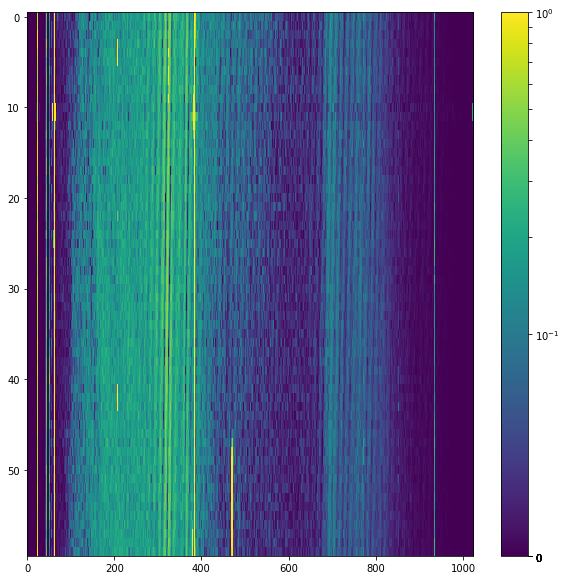

In [79]:

#Pre Swap

data = v.get_data(1,98,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


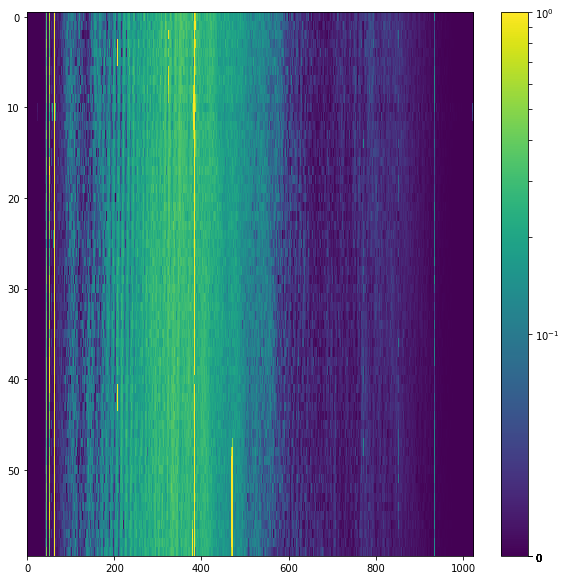

In [81]:

# Post Swap

data = uv.get_data(1,98,'xx')

plt.figure(figsize=(10,10))
plt.imshow(np.abs(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
#plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


# Antenna Metrics Analysis

In [ ]:
am.data.data_array = new_data_array

In [53]:
am.xants = []

In [54]:
rawRed = ant_metrics.red_corr_metrics(v,['xx','yy','xy','yx'],['x','y'],uv.antenna_numbers,reds,am.xants,rawMetric = True)

In [55]:
z_scores = ant_metrics.per_antenna_modified_z_scores(rawRed)

In [56]:

values = []

values_raw = []

for key in z_scores.keys():
    
    values.append(z_scores[key]) 
    
    values_raw.append(rawRed[key])


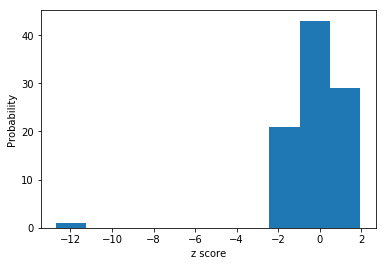

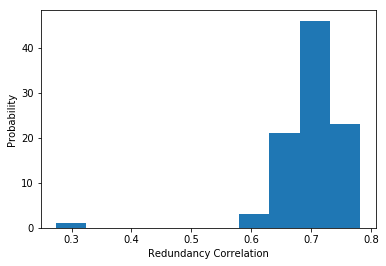

In [57]:
plt.figure()
plt.hist(values)
plt.xlabel('z score')
plt.ylabel('Probability')
#plt.xlim(-2,2)
plt.show()

plt.figure()
plt.hist(values_raw)
plt.xlabel('Redundancy Correlation')
plt.ylabel('Probability')
plt.show()

In [82]:

am.iterative_antenna_metrics_and_flagging(crossCut = 5,deadCut = 5)

print am.xants


[(50, 'x'), (11, 'x'), (1, 'x'), (1, 'y'), (11, 'y')]


In [83]:

def plot_metric(metrics, ants=None, antpols=None, title='', ylabel='Modified z-Score', xlabel=''):
    
    if ants is None:
        
        ants = list(set([key[0] for key in metrics.keys()]))
        
    if antpols is None:
        
        antpols = list(set([key[1] for key in metrics.keys()]))
        
    for antpol in antpols:
        
        for i,ant in enumerate(ants):
            
            metric = 0
            
            if metrics.has_key((ant,antpol)):
                
                metric = metrics[(ant,antpol)]
                
            plt.plot(i,metric,'.')
            
            plt.annotate(str(ant) + antpol, xy = (i,metrics[(ant,antpol)]))
            
        plt.gca().set_prop_cycle(None)
        
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()
        

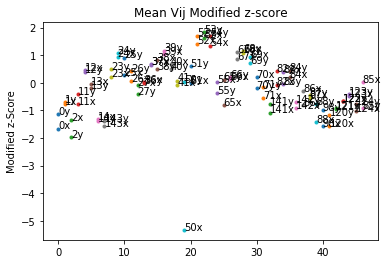

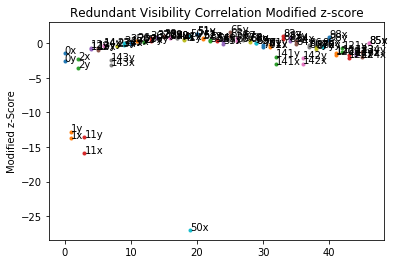

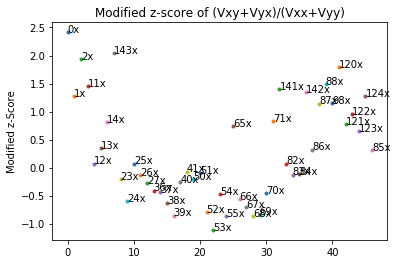

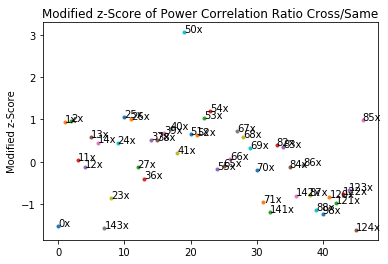

In [84]:

plt.figure()

plot_metric(am.finalModzScores['meanVij'],title='Mean Vij Modified z-score')

plt.figure()

plot_metric(am.finalModzScores['redCorr'],title = 'Redundant Visibility Correlation Modified z-score')

plt.figure()

plot_metric(am.finalModzScores['meanVijXPol'],antpols = ['x'], title = 'Modified z-score of (Vxy+Vyx)/(Vxx+Vyy)')

plt.figure()

plot_metric(am.finalModzScores['redCorrXPol'], antpols = ['x'], title = 'Modified z-Score of Power Correlation Ratio Cross/Same')


In [85]:
rawRed = ant_metrics.red_corr_metrics(v,['xx','yy','xy','yx'],['x','y'],uv.antenna_numbers,reds,am.xants,rawMetric = True)

In [86]:
z_scores = ant_metrics.per_antenna_modified_z_scores(rawRed)

In [87]:

values = []

values_raw = []

for key in z_scores.keys():
    
    values.append(z_scores[key]) 
    
    values_raw.append(rawRed[key])


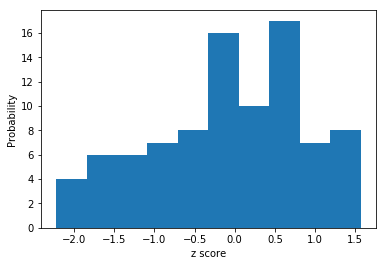

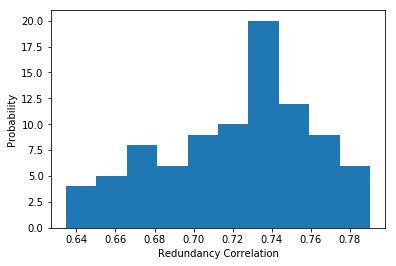

In [88]:
plt.figure()
plt.hist(values)
plt.xlabel('z score')
plt.ylabel('Probability')
#plt.xlim(-2,2)
plt.show()

plt.figure()
plt.hist(values_raw)
plt.xlabel('Redundancy Correlation')
plt.ylabel('Probability')
plt.show()

# Tests to Determine Redundancy Factors

In [6]:

#Long Vertical Baselines (84 meters)

data0 = uv.get_data(1,85,'xx')

data1 = uv.get_data(2,86,'xx')

#Short Vertical Baselines (28 meters)

data2 = uv.get_data(11,37,'xx')

data3 = uv.get_data(12,38,'xx')

#Long Horizontal Baselines (84 meters)

data4 = uv.get_data(82,88,'xx')

data5 = uv.get_data(65,71,'xx')

#Short Horizontal Baselines (28 meters)

data6 = uv.get_data(0,2,'xx')

data7 = uv.get_data(11,13,'xx')

#Perform the steps for calculating the redundancy up until you take the median

test1 = np.abs(np.mean(data0 * data1.conj(),axis = 0))
test2 = np.abs(np.mean(data2 * data3.conj(),axis = 0))
test3 = np.abs(np.mean(data4 * data5.conj(),axis = 0))
test4 = np.abs(np.mean(data6 * data7.conj(),axis = 0))



In [7]:

autoPower = ant_metrics.compute_median_auto_power_dict(uv, ['xx','xy','yx','yy'], reds)

#Calculate the median seperately and store it in corr

corr1 = np.median(test1)
corr2 = np.median(test2)
corr3 = np.median(test3)
corr4 = np.median(test4)


full_corr1 = corr1/np.sqrt(autoPower[1,85,'xx']*autoPower[2,86,'xx'])
full_corr2 = corr2/np.sqrt(autoPower[11,37,'xx']*autoPower[12,38,'xx'])
full_corr3 = corr3/np.sqrt(autoPower[82,88,'xx']*autoPower[65,71,'xx'])
full_corr4 = corr4/np.sqrt(autoPower[0,2,'xx']*autoPower[11,13,'xx'])

print full_corr1
print full_corr2
print full_corr3
print full_corr4


0.799411906462
0.993528433698
0.953971988725
0.979050089681


In [8]:

min_diff1 = 1000
min_diff2 = 1000
min_diff3 = 1000
min_diff4 = 1000

min_diff_ind1_1 = 0
min_diff_ind1_2 = 0
min_diff_ind1_3 = 0
min_diff_ind1_4 = 0

#Find the first of the two frequencies used to calculate the median


for i in range(len(test1)):
    
    if (np.abs(test1[i]-corr1) < min_diff1):
        
        min_diff1 = np.abs(test1[i]-corr1)
        
        min_diff_ind1_1 = i
        
    if (np.abs(test2[i]-corr1) < min_diff2):
        
        min_diff2 = np.abs(test2[i]-corr2)
        
        min_diff_ind1_2 = i
    
    if (np.abs(test3[i]-corr3) < min_diff3):
        
        min_diff3 = np.abs(test3[i]-corr3)
        
        min_diff_ind1_3 = i
    
    if (np.abs(test4[i]-corr4) < min_diff4):
        
        min_diff4 = np.abs(test4[i]-corr4)
        
        min_diff_ind1_4 = i



In [9]:


min_diff1 = 1000
min_diff2 = 1000
min_diff3 = 1000
min_diff4 = 1000

min_diff_ind2_1 = 0
min_diff_ind2_2 = 0
min_diff_ind2_3 = 0
min_diff_ind2_4 = 0

#Find the second of the two frequencies used to calculate the median

for i in range(len(test1)):
    
    if (np.abs(test1[i]-corr1) < min_diff1) & (i != min_diff_ind1_1):
        
        min_diff1 = np.abs(test1[i]-corr1)
        
        min_diff_ind2_1 = i
        
    if (np.abs(test2[i]-corr2) < min_diff2) & (i != min_diff_ind1_2):
        
        min_diff2 = np.abs(test2[i]-corr2)
        
        min_diff_ind2_2 = i
    
    if (np.abs(test3[i]-corr3) < min_diff3) & (i != min_diff_ind1_3):
        
        min_diff3 = np.abs(test3[i]-corr3)
        
        min_diff_ind2_3 = i
    
    if (np.abs(test4[i]-corr4) < min_diff4) & (i != min_diff_ind1_4):
        
        min_diff4 = np.abs(test4[i]-corr4)
        
        min_diff_ind2_4 = i


In [10]:

#Store the visibility data for both of the frequencies for both of the baselines for the first corr value.

data0_ind = uv.antpair2ind(1,85)
data1_ind = uv.antpair2ind(2,86)

freq1_data0 = uv.data_array[data0_ind,0,min_diff_ind1_1,0]
freq1_data1 = uv.data_array[data1_ind,0,min_diff_ind1_1,0]

freq2_data0 = uv.data_array[data0_ind,0,min_diff_ind2_1,0]
freq2_data1 = uv.data_array[data1_ind,0,min_diff_ind2_1,0]


In [11]:

#Store the visibility data for both of the frequencies for both of the baselines for the second corr value.

data2_ind = uv.antpair2ind(1,25)
data3_ind = uv.antpair2ind(2,26)

freq1_data2 = uv.data_array[data2_ind,0,min_diff_ind1_2,0]
freq1_data3 = uv.data_array[data3_ind,0,min_diff_ind1_2,0]

freq2_data2 = uv.data_array[data2_ind,0,min_diff_ind2_2,0]
freq2_data3 = uv.data_array[data3_ind,0,min_diff_ind2_2,0]


In [12]:

#Store the visibility data for both of the frequencies for both of the baselines for the third corr value.

data4_ind = uv.antpair2ind(82,88)
data5_ind = uv.antpair2ind(65,71)

freq1_data4 = uv.data_array[data4_ind,0,min_diff_ind1_3,0]
freq1_data5 = uv.data_array[data5_ind,0,min_diff_ind1_3,0]

freq2_data4 = uv.data_array[data4_ind,0,min_diff_ind2_3,0]
freq2_data5 = uv.data_array[data5_ind,0,min_diff_ind2_3,0]


In [13]:

#Store the visibility data for both of the frequencies for both of the baselines for the fourth corr value.

data6_ind = uv.antpair2ind(0,2)
data7_ind = uv.antpair2ind(11,13)

freq1_data6 = uv.data_array[data6_ind,0,min_diff_ind1_4,0]
freq1_data7 = uv.data_array[data7_ind,0,min_diff_ind1_4,0]

freq2_data6 = uv.data_array[data6_ind,0,min_diff_ind2_4,0]
freq2_data7 = uv.data_array[data7_ind,0,min_diff_ind2_4,0]


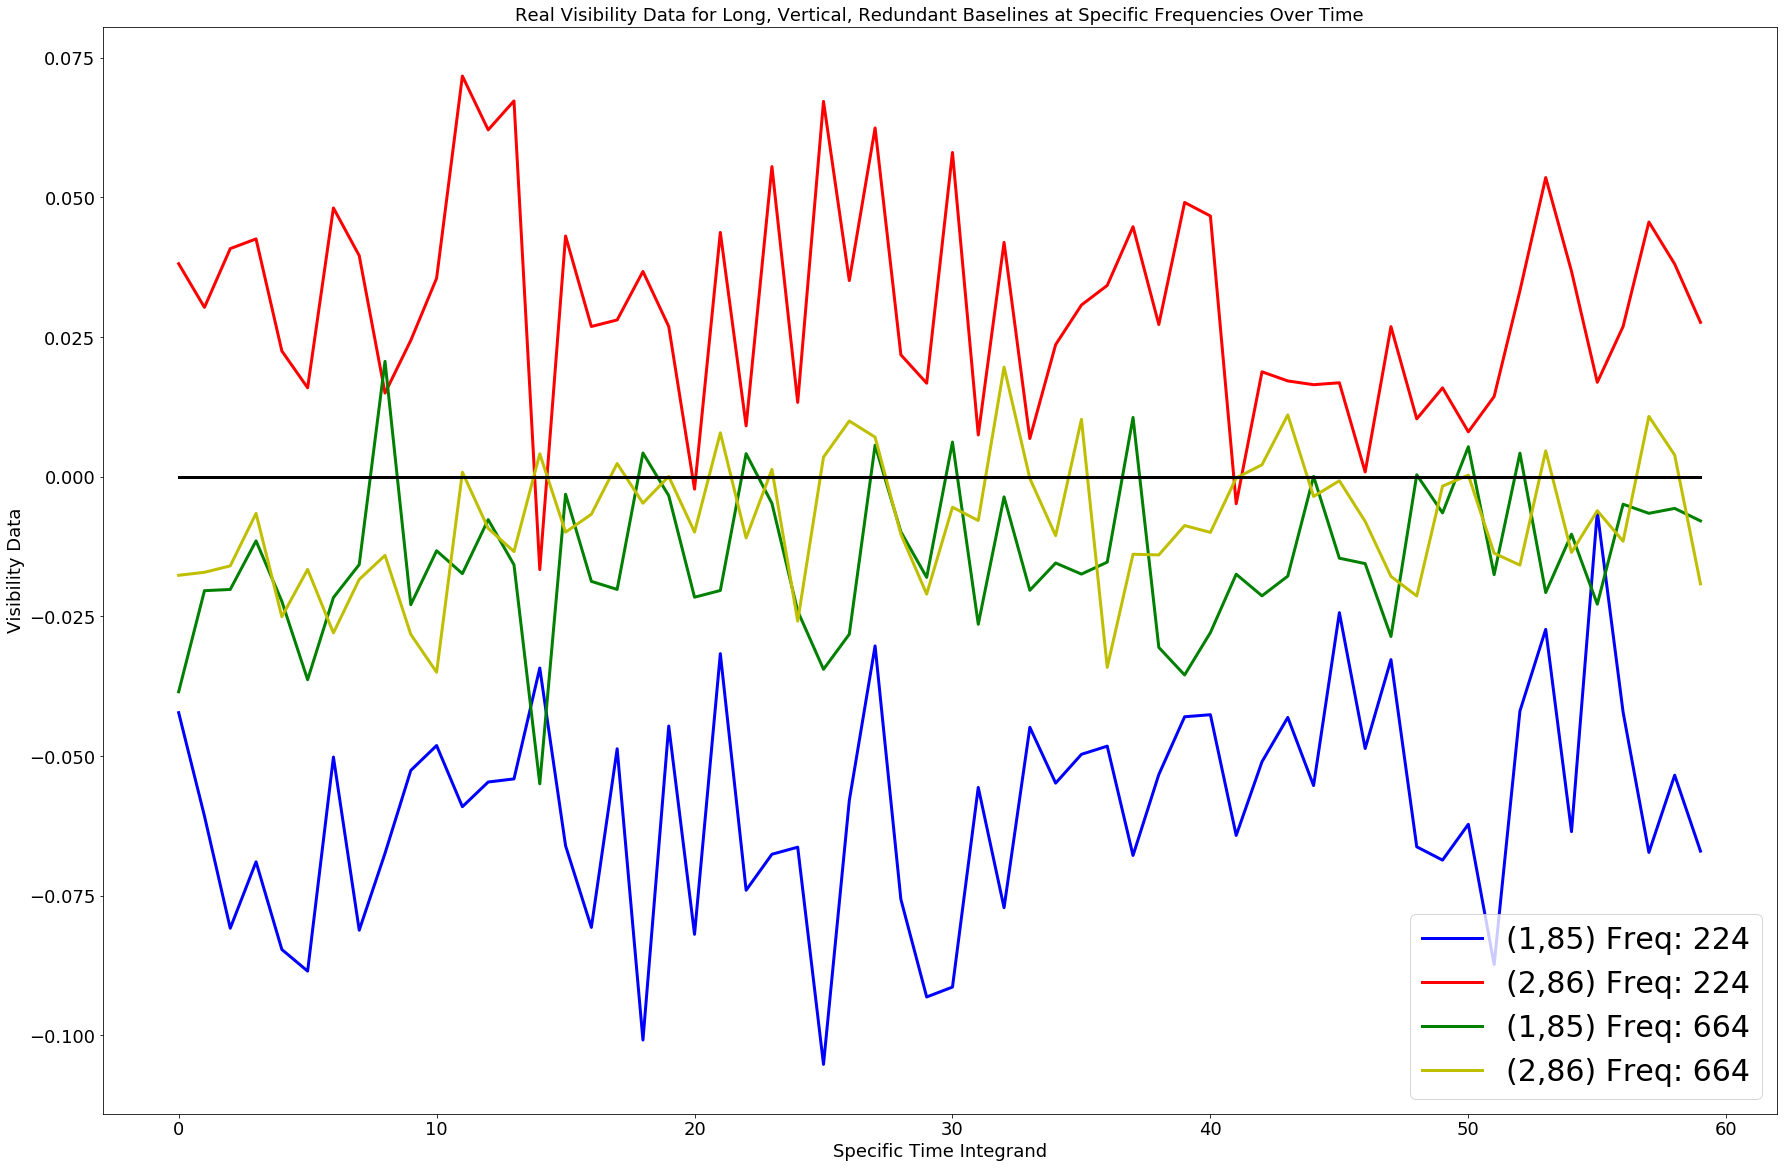

In [14]:

#Plot the real portions of the visibilities gathered

f1d0r = np.real(freq1_data0)
f1d1r = np.real(freq1_data1)
f2d0r = np.real(freq2_data0)
f2d1r = np.real(freq2_data1)

time = range(60)

plt.figure(figsize = (30,20))

plt.xticks(size = '18')
plt.yticks(size = '18')

plt.xlabel('Specific Time Integrand', size = '18')
plt.ylabel('Visibility Data', size = '18')

plt.title('Real Visibility Data for Long, Vertical, Redundant Baselines at Specific Frequencies Over Time', size = '18')

plt.plot(time,f1d0r,'b', label = '(1,85) Freq: 224', linewidth = 3.0)
plt.plot(time,f1d1r,'r', label = '(2,86) Freq: 224', linewidth = 3.0)
plt.plot(time,f2d0r,'g', label = '(1,85) Freq: 664', linewidth = 3.0)
plt.plot(time,f2d1r,'y', label = '(2,86) Freq: 664', linewidth = 3.0)
plt.plot(time,np.zeros(uv.Ntimes),'k', linewidth = 3.0)

plt.legend(prop={'size': 30})

plt.show()


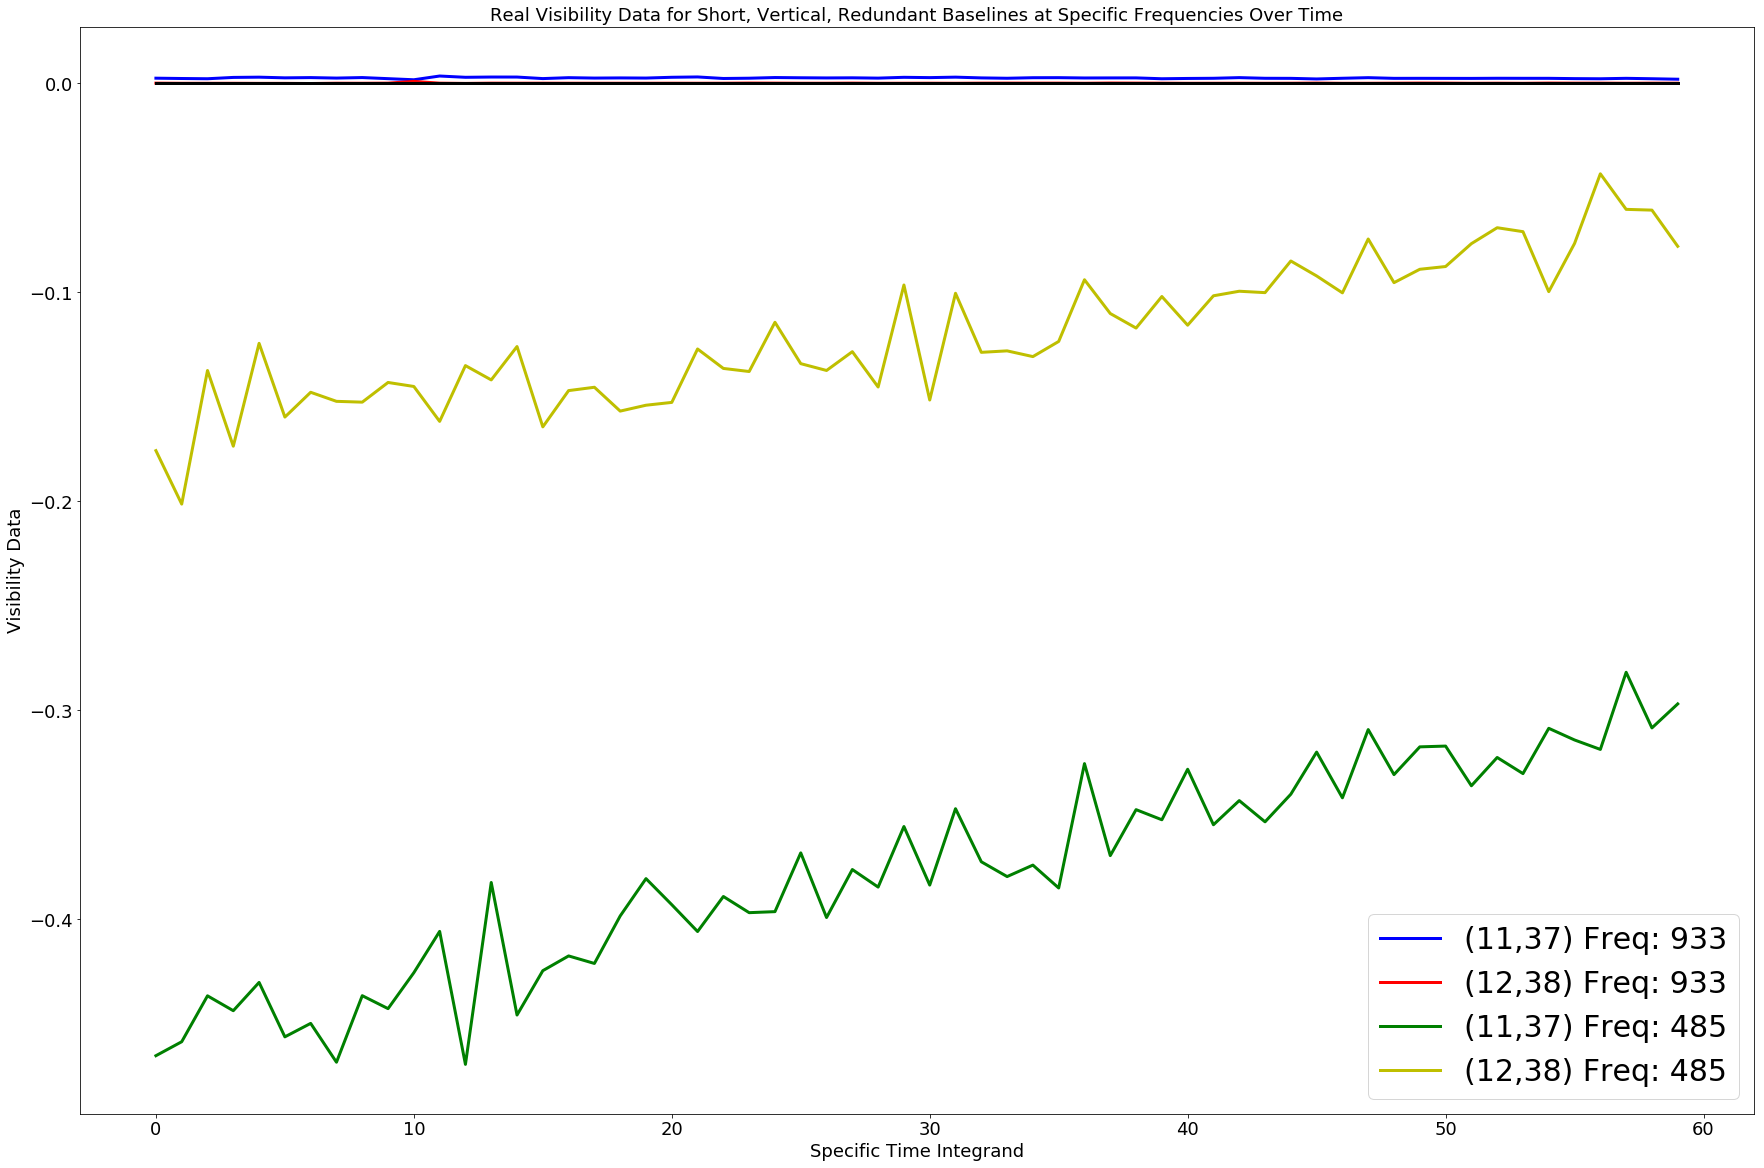

In [15]:

#Plot the real portions of the visibilities gathered

f1d2r = np.real(freq1_data2)
f1d3r = np.real(freq1_data3)
f2d2r = np.real(freq2_data2)
f2d3r = np.real(freq2_data3)

time = range(60)

plt.figure(figsize = (30,20))

plt.xticks(size = '18')
plt.yticks(size = '18')

plt.xlabel('Specific Time Integrand', size = '18')
plt.ylabel('Visibility Data', size = '18')

plt.title('Real Visibility Data for Short, Vertical, Redundant Baselines at Specific Frequencies Over Time', size = '18')

plt.plot(time,f1d2r,'b', label = '(11,37) Freq: 933', linewidth = 3.0)
plt.plot(time,f1d3r,'r', label = '(12,38) Freq: 933', linewidth = 3.0)
plt.plot(time,f2d2r,'g', label = '(11,37) Freq: 485', linewidth = 3.0)
plt.plot(time,f2d3r,'y', label = '(12,38) Freq: 485', linewidth = 3.0)
plt.plot(time,np.zeros(uv.Ntimes),'k', linewidth = 3.0)

plt.legend(prop={'size': 30})

plt.show()


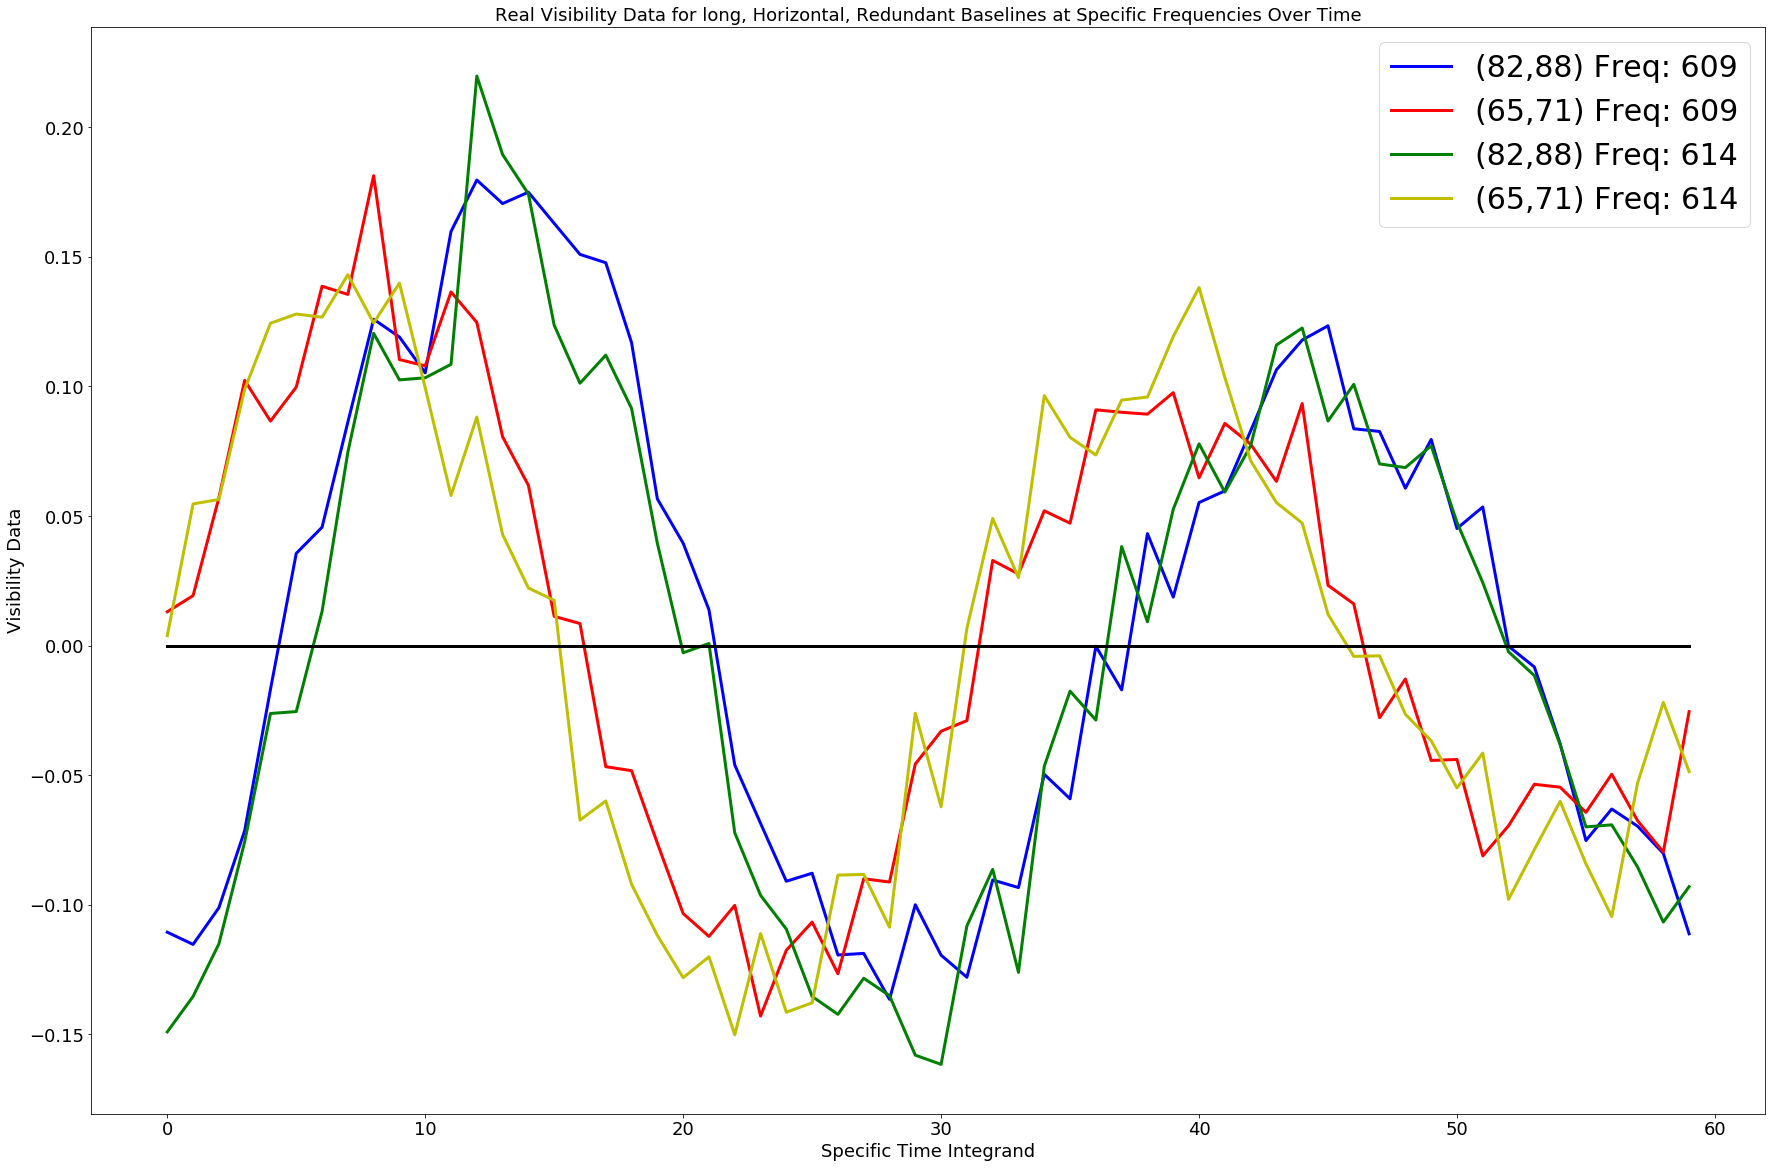

In [16]:

#Plot the real portions of the visibilities gathered

f1d4r = np.real(freq1_data4)
f1d5r = np.real(freq1_data5)
f2d4r = np.real(freq2_data4)
f2d5r = np.real(freq2_data5)

time = range(60)

plt.figure(figsize = (30,20))

plt.xticks(size = '18')
plt.yticks(size = '18')

plt.xlabel('Specific Time Integrand', size = '18')
plt.ylabel('Visibility Data', size = '18')

plt.title('Real Visibility Data for long, Horizontal, Redundant Baselines at Specific Frequencies Over Time', size = '18')

plt.plot(time,f1d4r,'b', label = '(82,88) Freq: 609', linewidth = 3.0)
plt.plot(time,f1d5r,'r', label = '(65,71) Freq: 609', linewidth = 3.0)
plt.plot(time,f2d4r,'g', label = '(82,88) Freq: 614', linewidth = 3.0)
plt.plot(time,f2d5r,'y', label = '(65,71) Freq: 614', linewidth = 3.0)
plt.plot(time,np.zeros(uv.Ntimes),'k', linewidth = 3.0)

plt.legend(prop={'size': 30})

plt.show()


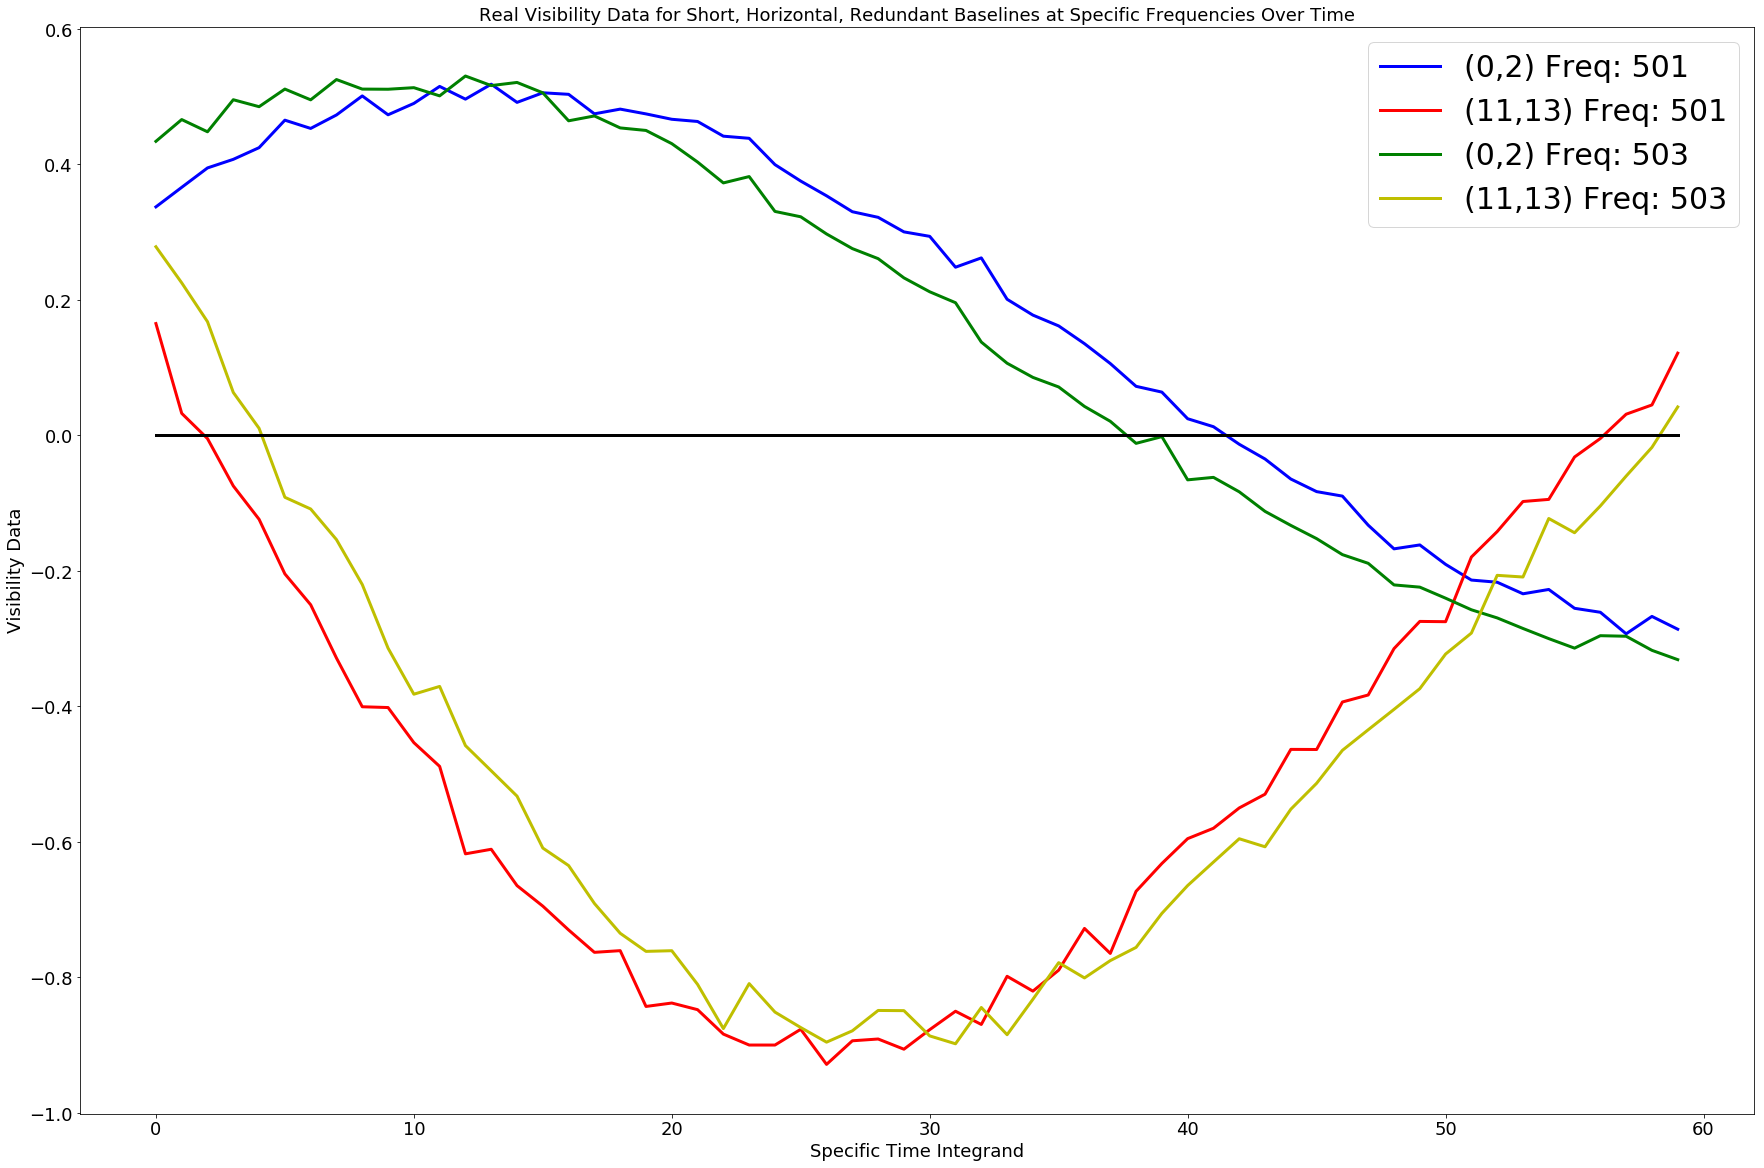

In [17]:

#Plot the real portions of the visibilities gathered

f1d6r = np.real(freq1_data6)
f1d7r = np.real(freq1_data7)
f2d6r = np.real(freq2_data6)
f2d7r = np.real(freq2_data7)

time = range(60)

plt.figure(figsize = (30,20))

plt.xticks(size = '18')
plt.yticks(size = '18')

plt.xlabel('Specific Time Integrand', size = '18')
plt.ylabel('Visibility Data', size = '18')

plt.title('Real Visibility Data for Short, Horizontal, Redundant Baselines at Specific Frequencies Over Time', size = '18')

plt.plot(time,f1d6r,'b', label = '(0,2) Freq: 501', linewidth = 3.0)
plt.plot(time,f1d7r,'r', label = '(11,13) Freq: 501', linewidth = 3.0)
plt.plot(time,f2d6r,'g', label = '(0,2) Freq: 503', linewidth = 3.0)
plt.plot(time,f2d7r,'y', label = '(11,13) Freq: 503', linewidth = 3.0)
plt.plot(time,np.zeros(uv.Ntimes),'k', linewidth = 3.0)

plt.legend(prop={'size': 30})

plt.show()


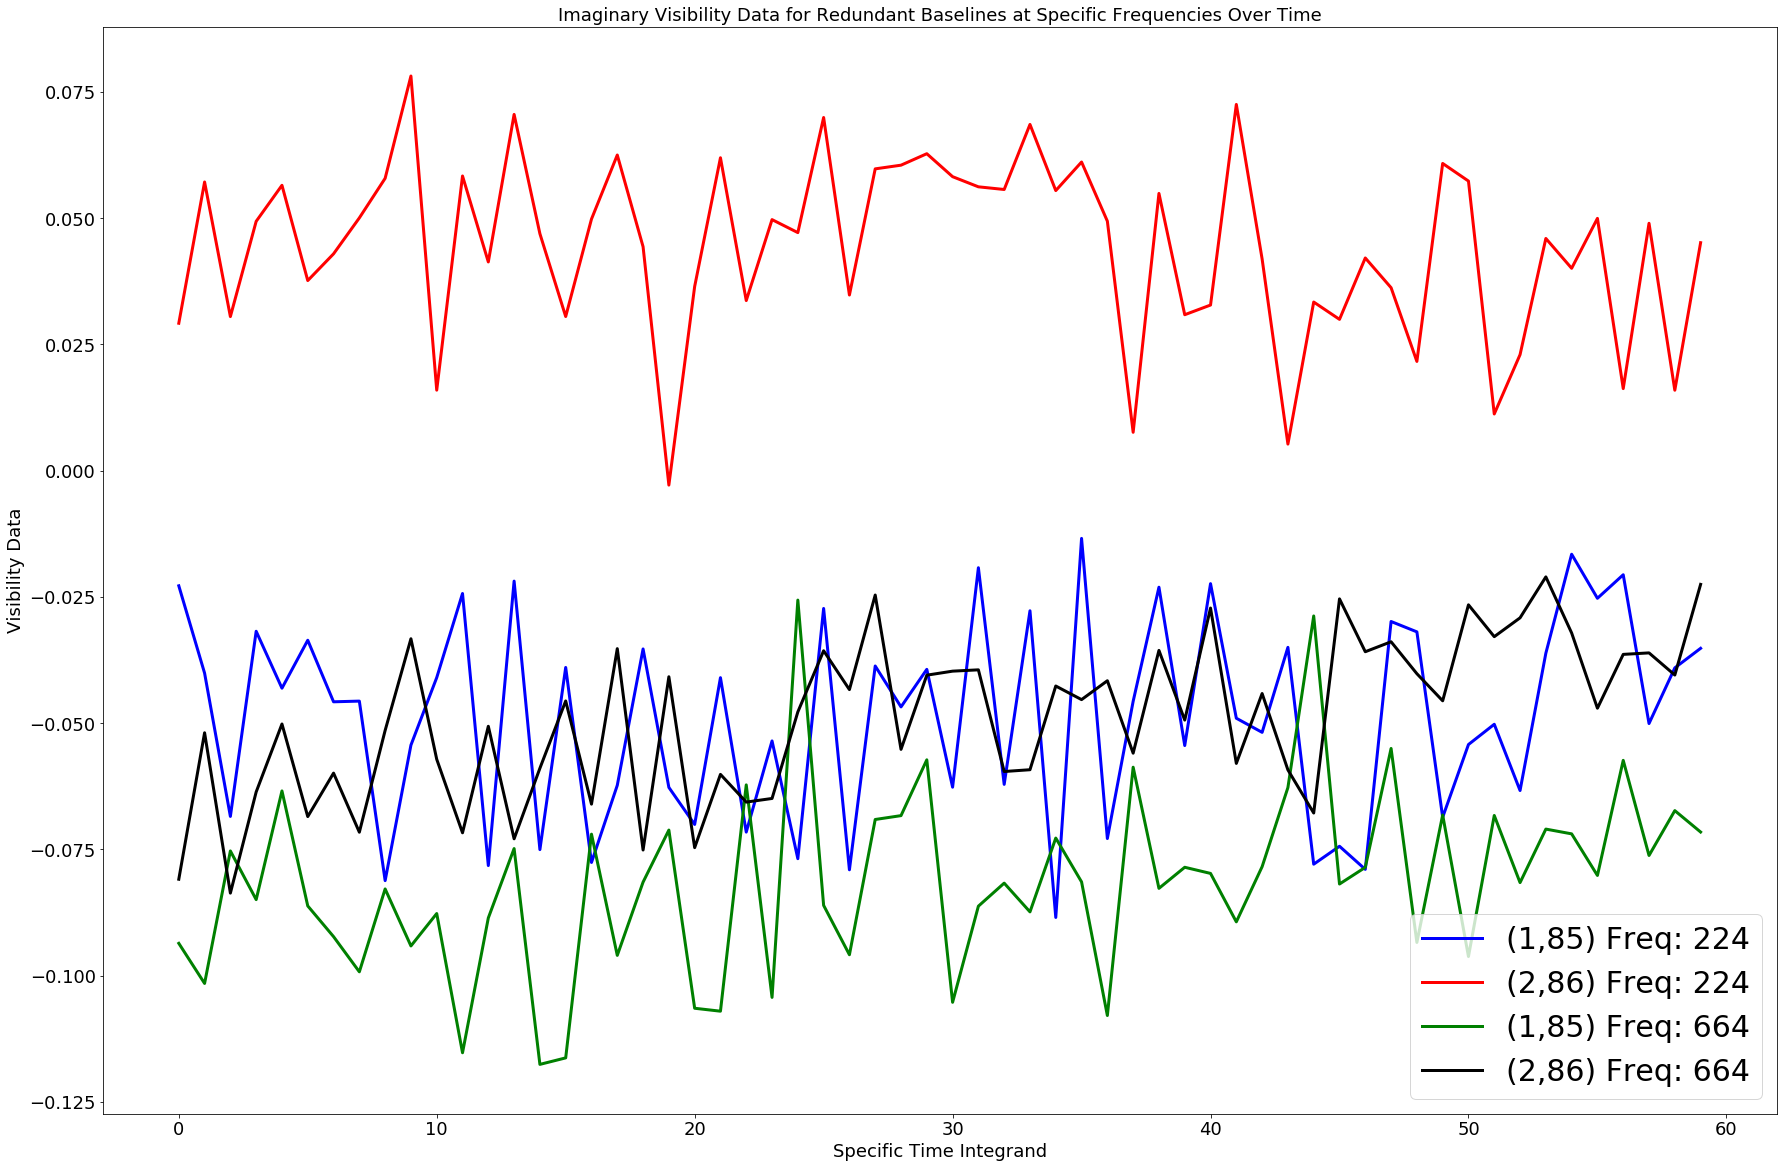

In [18]:

f1d0i = np.imag(freq1_data0)
f1d1i = np.imag(freq1_data1)
f2d0i = np.imag(freq2_data0)
f2d1i = np.imag(freq2_data1)

time = range(60)

plt.figure(figsize = (30,20))

plt.xticks(size = '18')
plt.yticks(size = '18')

plt.xlabel('Specific Time Integrand', size = '18')
plt.ylabel('Visibility Data', size = '18')

plt.title('Imaginary Visibility Data for Redundant Baselines at Specific Frequencies Over Time', size = '18')

plt.plot(time,f1d0i,'b', label = '(1,85) Freq: 224', linewidth = 3.0)
plt.plot(time,f1d1i,'r', label = '(2,86) Freq: 224', linewidth = 3.0)
plt.plot(time,f2d0i,'g', label = '(1,85) Freq: 664', linewidth = 3.0)
plt.plot(time,f2d1i,'k', label = '(2,86) Freq: 664', linewidth = 3.0)

plt.legend(prop={'size': 30})

plt.show()


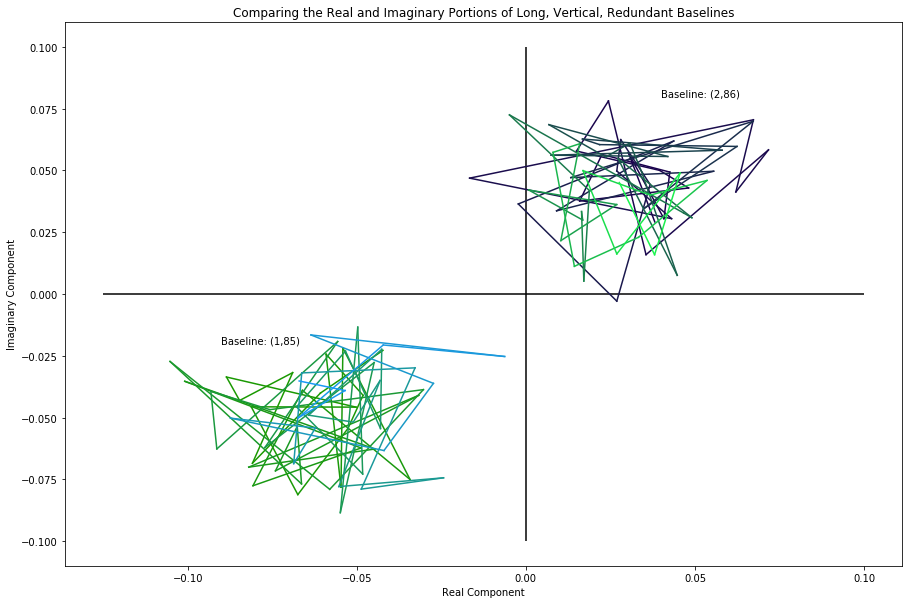

In [19]:

fig = plt.figure(figsize = (15,10))

complex_0 = np.zeros((60,2))
complex_1 = np.zeros((60,2))

for i in range(len(freq1_data0)):
    
    complex_0[i,0] = freq1_data0[i].real
    complex_0[i,1] = freq1_data0[i].imag
    
    complex_1[i,0] = freq1_data1[i].real
    complex_1[i,1] = freq1_data1[i].imag
    

T=np.linspace(0,1,60)**2

ax = fig.add_subplot(111)

plt.vlines(0,-.1,.1)
plt.hlines(0,-0.125,0.1)

plt.annotate('Baseline: (1,85)', (-0.09,-0.02))
plt.annotate('Baseline: (2,86)', (0.04,0.08))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_0[i:i+s+1,0],complex_0[i:i+s+1,1],color=(0.1,0.6,T[i]))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_1[i:i+s+1,0],complex_1[i:i+s+1,1],color=(0.1,T[i],0.3))
    
plt.title('Comparing the Real and Imaginary Portions of Long, Vertical, Redundant Baselines')
plt.ylabel('Imaginary Component')
plt.xlabel('Real Component')
plt.show()


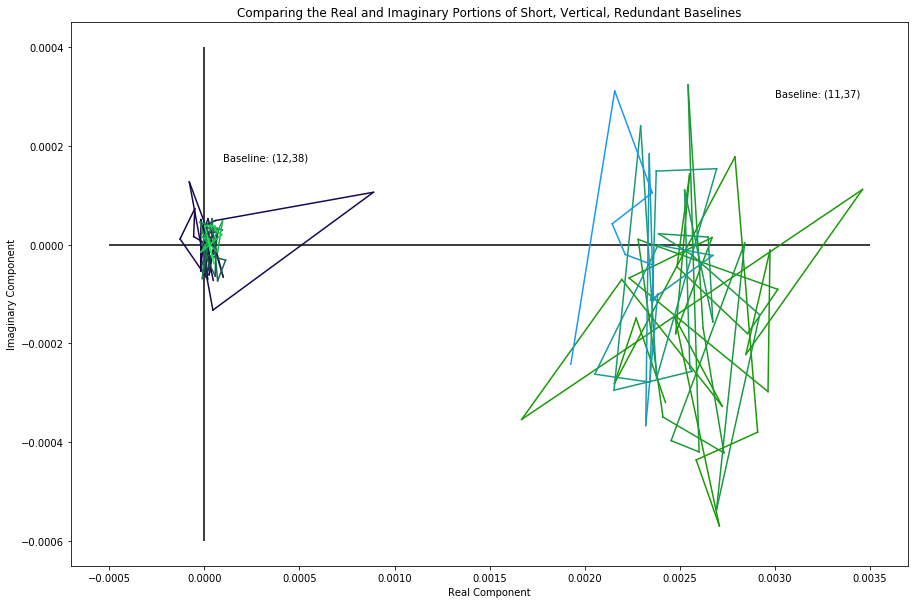

In [20]:

fig = plt.figure(figsize = (15,10))

complex_2 = np.zeros((60,2))
complex_3 = np.zeros((60,2))

for i in range(len(freq1_data0)):
    
    complex_2[i,0] = freq1_data2[i].real
    complex_2[i,1] = freq1_data2[i].imag
    
    complex_3[i,0] = freq1_data3[i].real
    complex_3[i,1] = freq1_data3[i].imag
    

T=np.linspace(0,1,60)**2

ax = fig.add_subplot(111)

plt.hlines(0,-0.0005,0.0035)
plt.vlines(0,-0.0006,0.0004)

plt.annotate('Baseline: (11,37)',(0.003,0.0003))
plt.annotate('Baseline: (12,38)',(0.0001,0.00017))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_2[i:i+s+1,0],complex_2[i:i+s+1,1],color=(0.1,0.6,T[i]))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_3[i:i+s+1,0],complex_3[i:i+s+1,1],color=(0.1,T[i],0.3))
    
plt.title('Comparing the Real and Imaginary Portions of Short, Vertical, Redundant Baselines')
plt.ylabel('Imaginary Component')
plt.xlabel('Real Component')
plt.show()


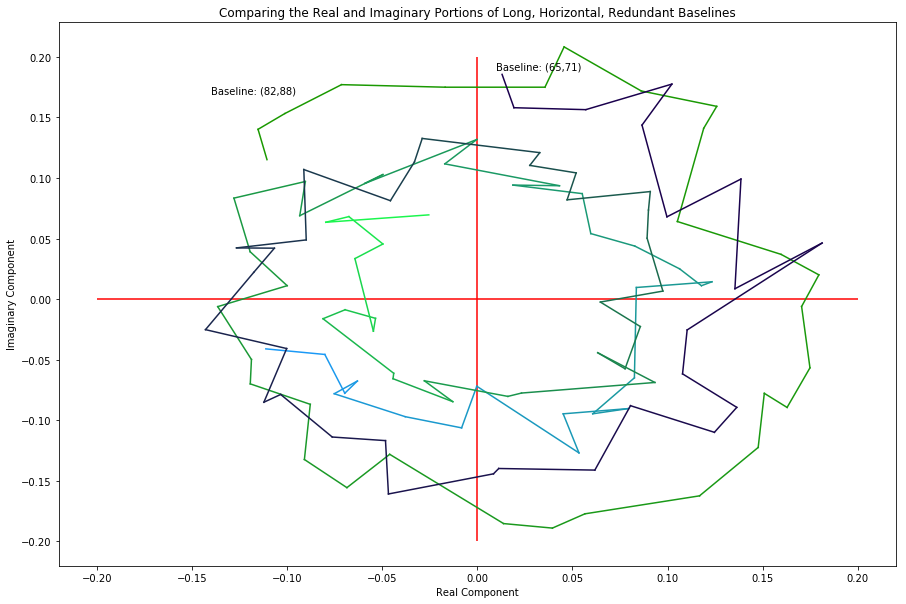

In [43]:

fig = plt.figure(figsize = (15,10))

complex_4 = np.zeros((60,2))
complex_5 = np.zeros((60,2))

plt.vlines(0,-.2,.2,'r')
plt.hlines(0,-.2,.2,'r')

plt.annotate('Baseline: (82,88)', (-.14,.17))
plt.annotate('Baseline: (65,71)', (0.01,.19))

for i in range(len(freq1_data4)):
    
    complex_4[i,0] = freq1_data4[i].real
    complex_4[i,1] = freq1_data4[i].imag
    
    complex_5[i,0] = freq1_data5[i].real
    complex_5[i,1] = freq1_data5[i].imag
    

T=np.linspace(0,1,60)**2

ax = fig.add_subplot(111)

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_4[i:i+s+1,0],complex_4[i:i+s+1,1],color=(0.1,0.6,T[i]))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_5[i:i+s+1,0],complex_5[i:i+s+1,1],color=(0.1,T[i],0.3))
    
plt.title('Comparing the Real and Imaginary Portions of Long, Horizontal, Redundant Baselines')
plt.ylabel('Imaginary Component')
plt.xlabel('Real Component')
plt.show()


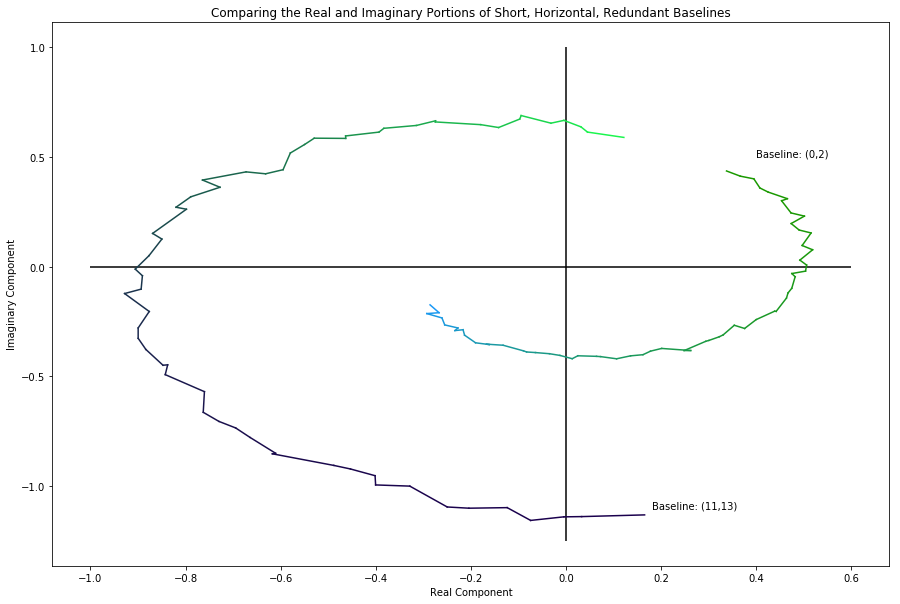

In [22]:

fig = plt.figure(figsize = (15,10))

complex_6 = np.zeros((60,2))
complex_7 = np.zeros((60,2))

for i in range(len(freq1_data4)):
    
    complex_6[i,0] = freq1_data6[i].real
    complex_6[i,1] = freq1_data6[i].imag
    
    complex_7[i,0] = freq1_data7[i].real
    complex_7[i,1] = freq1_data7[i].imag
    

T=np.linspace(0,1,60)**2

ax = fig.add_subplot(111)

plt.vlines(0,-1.25,1)
plt.hlines(0,-1,0.6)

plt.annotate('Baseline: (0,2)',(0.4,0.5))
plt.annotate('Baseline: (11,13)',(0.18,-1.1))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_6[i:i+s+1,0],complex_6[i:i+s+1,1],color=(0.1,0.6,T[i]))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_7[i:i+s+1,0],complex_7[i:i+s+1,1],color=(0.1,T[i],0.3))
    
plt.title('Comparing the Real and Imaginary Portions of Short, Horizontal, Redundant Baselines')
plt.ylabel('Imaginary Component')
plt.xlabel('Real Component')
plt.show()


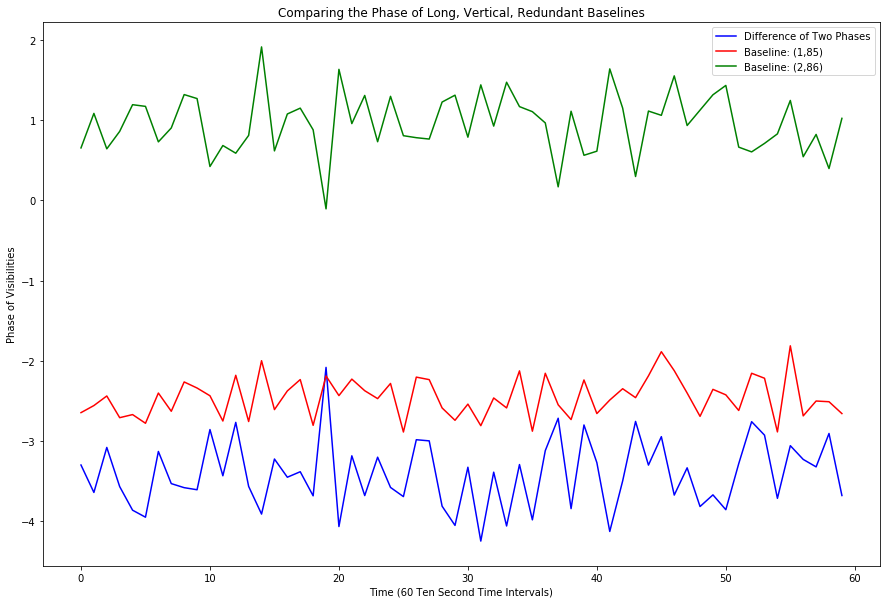

In [23]:

phase_fig1 = np.angle(freq1_data0) - np.angle(freq1_data1)

plt.figure(figsize = (15,10))

plt.plot(range(60),phase_fig1,'b', label = 'Difference of Two Phases')
plt.plot(range(60),np.angle(freq1_data0),'r', label = 'Baseline: (1,85)')
plt.plot(range(60),np.angle(freq1_data1),'g',label = 'Baseline: (2,86)')

plt.title('Comparing the Phase of Long, Vertical, Redundant Baselines')
plt.ylabel('Phase of Visibilities')
plt.xlabel('Time (60 Ten Second Time Intervals)')
plt.legend()
plt.show()


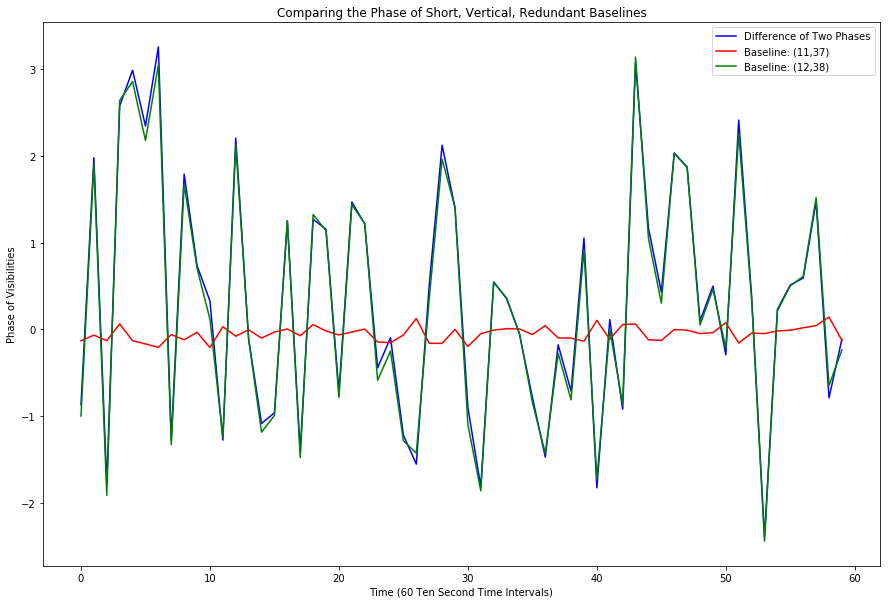

In [24]:

phase_fig2 = -np.angle(freq1_data2) + np.angle(freq1_data3)

plt.figure(figsize = (15,10))

plt.plot(range(60),phase_fig2,'b', label = 'Difference of Two Phases')
plt.plot(range(60),np.angle(freq1_data2),'r',label = 'Baseline: (11,37)')
plt.plot(range(60),np.angle(freq1_data3),'g', label = 'Baseline: (12,38)')

plt.title('Comparing the Phase of Short, Vertical, Redundant Baselines')
plt.ylabel('Phase of Visibilities')
plt.xlabel('Time (60 Ten Second Time Intervals)')
plt.legend()
plt.show()


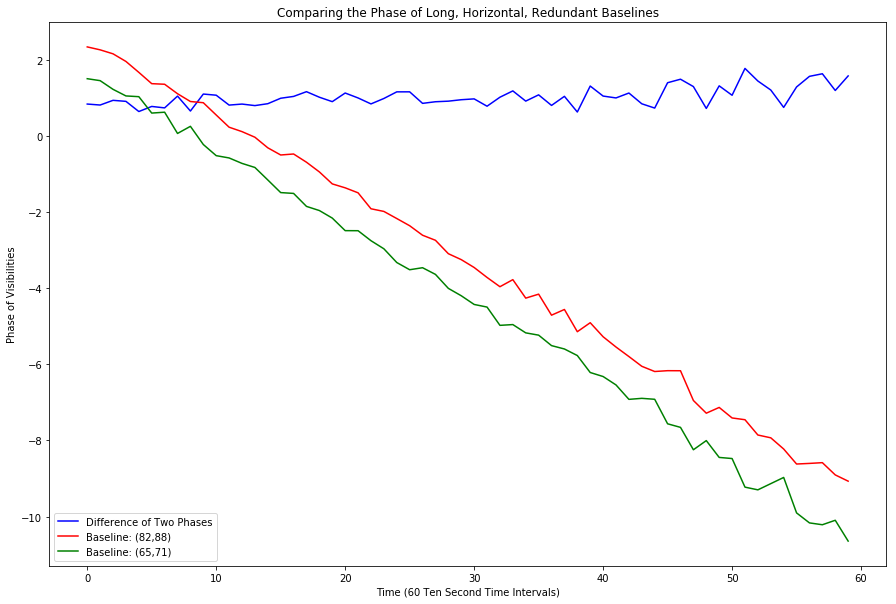

In [25]:

phase_fig3 = np.angle(freq1_data4) - np.angle(freq1_data5)

plt.figure(figsize = (15,10))

plt.plot(range(60),np.unwrap(phase_fig3),'b',label = 'Difference of Two Phases')
plt.plot(range(60),np.unwrap(np.angle(freq1_data4)),'r',label = 'Baseline: (82,88)')
plt.plot(range(60),np.unwrap(np.angle(freq1_data5)),'g', label = 'Baseline: (65,71)')

plt.title('Comparing the Phase of Long, Horizontal, Redundant Baselines')
plt.ylabel('Phase of Visibilities')
plt.xlabel('Time (60 Ten Second Time Intervals)')
plt.legend()
plt.show()


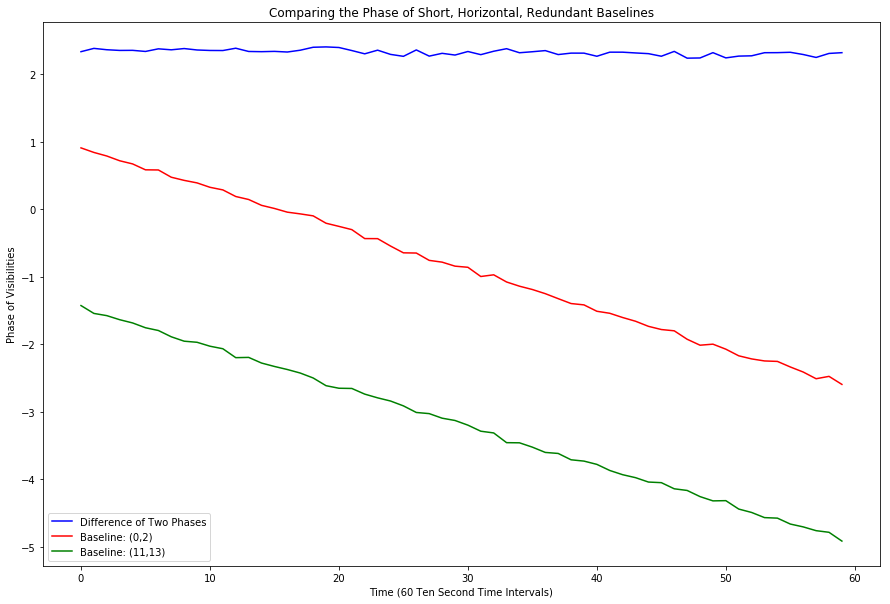

In [26]:

phase_fig4 = np.angle(freq1_data6) - np.angle(freq1_data7)

plt.figure(figsize = (15,10))

plt.plot(range(60),np.unwrap(phase_fig4),'b', label = 'Difference of Two Phases')
plt.plot(range(60),np.unwrap(np.angle(freq1_data6)),'r', label = 'Baseline: (0,2)')
plt.plot(range(60),np.unwrap(np.angle(freq1_data7)),'g',label = 'Baseline: (11,13)')

plt.title('Comparing the Phase of Short, Horizontal, Redundant Baselines')
plt.ylabel('Phase of Visibilities')
plt.xlabel('Time (60 Ten Second Time Intervals)')
plt.legend()
plt.show()


# Plotting the Redundancy Corr as a Function of Position

In [27]:

autoPower = ant_metrics.compute_median_auto_power_dict(uv, ['xx','xy','yx','yy'], reds)

antpos, ants = uv.get_ENU_antpos()


In [1]:

def red_corr_func(ant0,ant1):
    
    if (ant0 == ant1):
        
        return 0
    
    if (ant0 <= ant1):
        
        base = (ant0,ant1)
    
    elif(ant0 > ant1):
        
        base = (ant1,ant0)
    
    ind1 = 100
    ind2 = 0
    
    for i in range(len(reds)):
        
        for j in range(len(reds[i])):
            
            if (reds[i][j] == base):
                
                ind1 = i
                ind2 = j
                
    if (ind1 == 100):
        
        return 0
    
    else: 
        
        avg = 0
        
        count = 0
        
        for k in range(len(reds[ind1])):
            
            if (k == ind2):
                
                avg += 0
                
            else:
                
                antenna1 = reds[ind1][k][0]
                antenna2 = reds[ind1][k][1]
                
                correlation = np.median(np.abs(np.mean(uv.get_data(base[0],base[1],'xx') * uv.get_data(antenna1,antenna2,'xx'),axis = 0)))
                
                avg += correlation/np.sqrt(autoPower[base[0],base[1],'xx']*autoPower[antenna1,antenna2,'xx'])
                
                count += 1
                
        avg = avg / count
        
        return avg
        
        
        

In [29]:

red_corr_storage_0 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_0[i] = red_corr_func(0,ants[i])

    
print red_corr_storage_0

[ 0.23150572  0.07648275  0.09419294  0.17454592  0.26681723  0.34329709
  0.16916814  0.          0.06192968  0.04379403  0.16595841  0.16622105
  0.63635299  0.          0.2609836   0.53430258  0.14459696  0.71557256
  0.69855342  0.18233346  0.10672594  0.09373133  0.34596943  0.
  0.58175882  0.74503836  0.80416086  0.15944422  0.19727887  0.16624385
  0.56539392  0.91688489  0.48618424  0.17406207  0.12411746  0.85312295
  0.702873    0.14329438  0.19087327  0.84327051  0.53215254  0.19905804
  0.08836582  0.72786618  0.10249374  0.10470781  0.05951705]


In [30]:

red_corr_storage_1 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_1[i] = red_corr_func(1,ants[i])

    
print red_corr_storage_1

[ 0.62681581  0.10075848  0.17292881  0.40393859  0.18617859  0.27001647
  0.11382015  0.          0.14955779  0.05951464  0.08456705  0.14452825
  0.35736734  0.05951705  0.1700208   0.1483046   0.24347706  0.25386052
  0.69200919  0.671201    0.19401711  0.11371903  0.75074178  0.58175882
  0.          0.22551675  0.79271858  0.82946702  0.14701215  0.61044085
  0.18825323  0.53692026  0.90288603  0.43627822  0.16173651  0.27268556
  0.8645216   0.66378979  0.18812064  0.35319963  0.77185956  0.46418851
  0.21632496  0.52126669  0.18134323  0.26054298  0.10562766]


In [31]:

red_corr_storage_41 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_41[i] = red_corr_func(41,ants[i])

    
print red_corr_storage_41

[ 0.16956733  0.68565093  0.          0.29360828  0.09022303  0.07012533
  0.09826397  0.          0.67390871  0.69054923  0.044202    0.04436796
  0.07952106  0.75890794  0.05937239  0.08302039  0.22504876  0.08912672
  0.12619569  0.1902739   0.55498667  0.92569954  0.18810032  0.09419294
  0.17292881  0.074595    0.12039347  0.15809772  0.42689206  0.19791139
  0.08078712  0.11525469  0.1861487   0.13982812  0.83393283  0.10802426
  0.14039843  0.15316307  0.59210027  0.08180486  0.15731209  0.22006679
  0.79000769  0.09629703  0.87724072  0.1464748   0.509144  ]


In [32]:

red_corr_storage_53 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_53[i] = red_corr_func(53,ants[i])

    
print red_corr_storage_53

[ 0.77091924  0.11731397  0.15731209  0.4330875   0.17093108  0.15694964
  0.291553    0.07738026  0.21008305  0.07232087  0.08232588  0.11349046
  0.44551278  0.11660942  0.15332146  0.19033371  0.45831928  0.20640655
  0.78359334  0.8375214   0.13240992  0.16999671  0.93827075  0.53215254
  0.77185956  0.17047848  0.6885611   0.87690359  0.26411075  0.34116617
  0.14639712  0.43375841  0.95942657  0.54844467  0.17911435  0.12466364
  0.82930093  0.78901383  0.22073034  0.56855795  0.          0.57998365
  0.14357616  0.54679562  0.1526816   0.65915943  0.18535722]


In [33]:

red_corr_storage_65 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_65[i] = red_corr_func(65,ants[i])

    
print red_corr_storage_65

[ 0.10389234  0.04818854  0.044202    0.0878677   0.54816356  0.2192111
  0.12001824  0.53641882  0.09674774  0.          0.          0.82793311
  0.15229028  0.05088258  0.59483835  0.13759858  0.0626197   0.17619352
  0.13650842  0.10808286  0.07964871  0.0476717   0.12783949  0.16595841
  0.08456705  0.26201025  0.10749912  0.08029293  0.06145097  0.05922179
  0.26393037  0.17010747  0.09913833  0.08521324  0.04493984  0.1977296
  0.1288126   0.08711215  0.06049995  0.15013839  0.08232588  0.06109536
  0.08224378  0.1731381   0.06776859  0.09432441  0.0879567 ]


In [34]:

red_corr_storage_82 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_82[i] = red_corr_func(82,ants[i])

    
print red_corr_storage_82

[ 0.12093429  0.0476717   0.04436796  0.11032039  0.88386157  0.52046424
  0.09864283  0.20992737  0.07630035  0.04574264  0.82793311  0.
  0.15763426  0.09772617  0.78582844  0.59535125  0.06718552  0.21592345
  0.15294898  0.07939621  0.06055675  0.08168815  0.13059704  0.16622105
  0.14452825  0.22894383  0.17544772  0.08290513  0.05587156  0.05832491
  0.40415165  0.24272633  0.11950078  0.07864056  0.05763294  0.27192777
  0.16745527  0.08303773  0.08299127  0.18466766  0.11349046  0.07909409
  0.05784961  0.14930029  0.08440188  0.09987857  0.06578302]


In [35]:

red_corr_storage_143 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_143[i] = red_corr_func(143,ants[i])

    
print red_corr_storage_143

[ 0.16833466  0.87639618  0.75890794  0.19360366  0.03805751  0.07697627
  0.04374135  0.          0.83060661  0.7678085   0.05088258  0.09772617
  0.131735    0.          0.09019709  0.0629025   0.13278029  0.09083316
  0.06795018  0.19957099  0.45854785  0.76234201  0.16887751  0.
  0.05951705  0.04379403  0.06169337  0.14489818  0.24598292  0.10272478
  0.04715422  0.08222218  0.12161434  0.16890362  0.52995819  0.07347098
  0.10027679  0.17051467  0.41622403  0.0898091   0.11660942  0.1941452
  0.65852531  0.10861302  0.67831529  0.15674678  0.59379101]


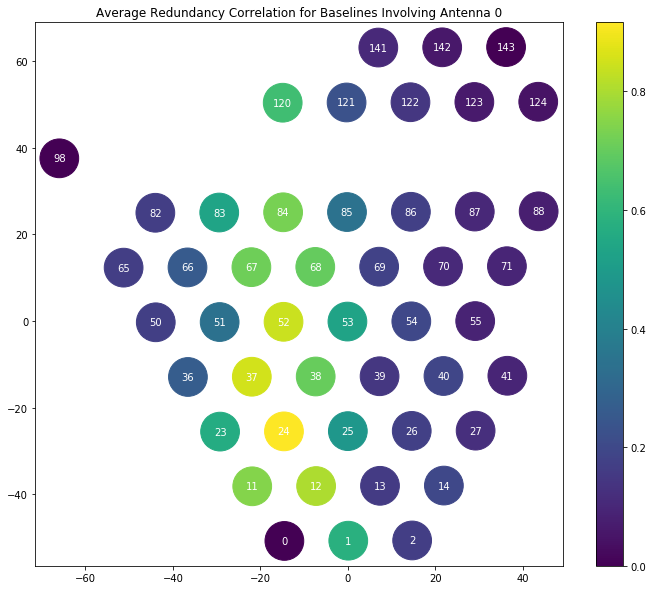

In [36]:

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_0,marker='.',s=6000)

for aa,ant in enumerate(ants):
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 0')
plt.colorbar()
plt.show()


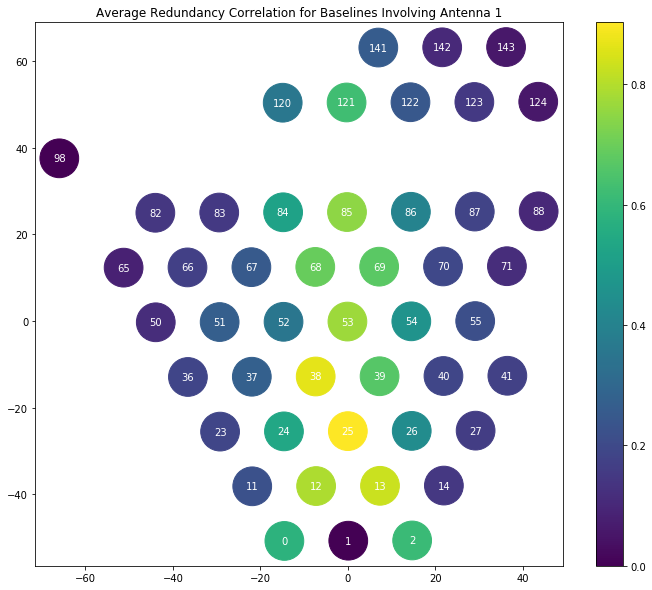

In [37]:

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_1,marker='.',s=6000)

for aa,ant in enumerate(ants):
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 1')
plt.colorbar()
plt.show()


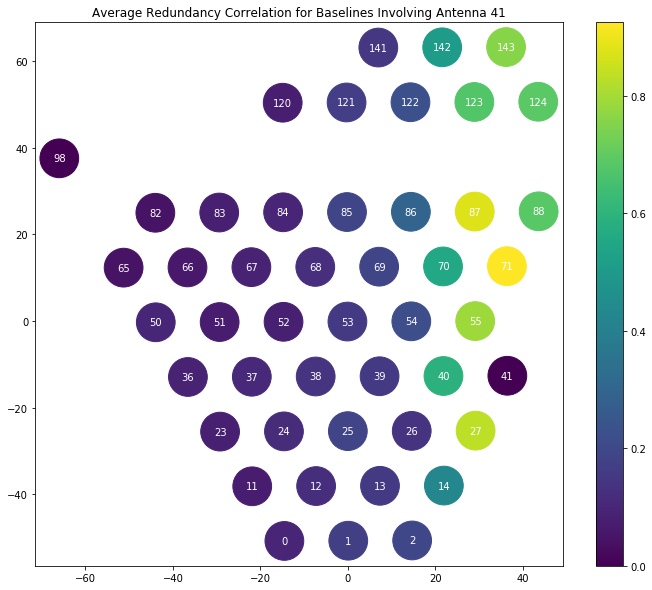

In [38]:

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_41,marker='.',s=6000)

for aa,ant in enumerate(ants):
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 41')
plt.colorbar()
plt.show()


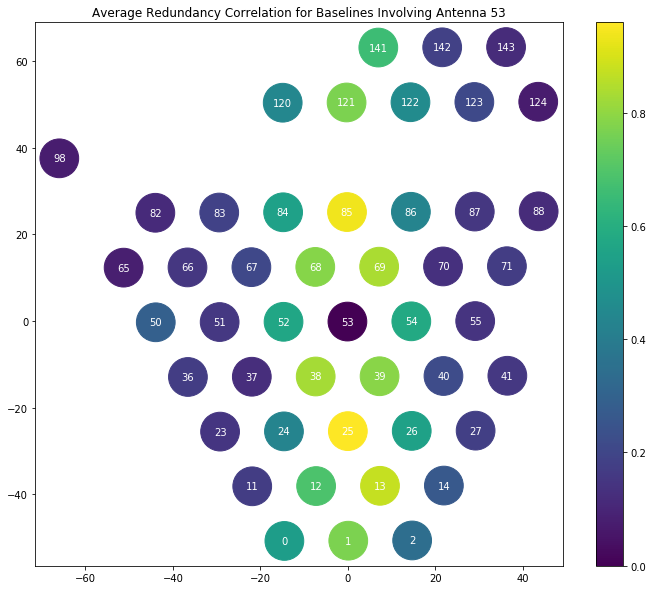

In [39]:

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_53,marker='.',s=6000)

for aa,ant in enumerate(ants):
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 53')
plt.colorbar()
plt.show()


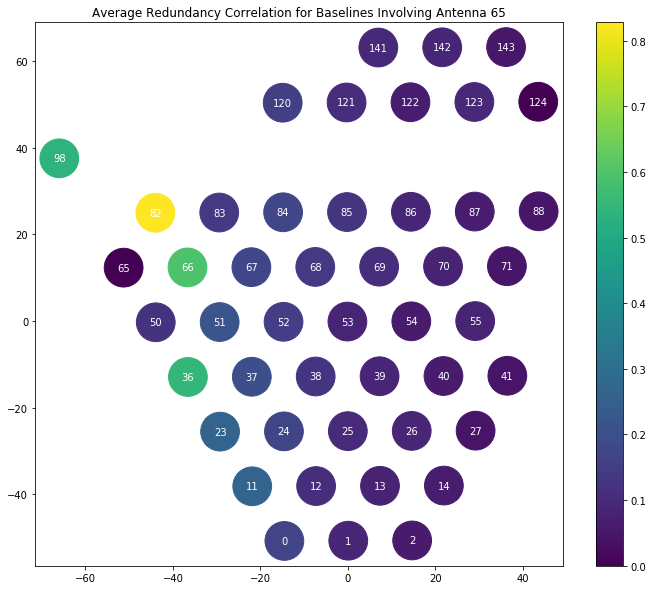

In [40]:

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_65,marker='.',s=6000)

for aa,ant in enumerate(ants):
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 65')
plt.colorbar()
plt.show()


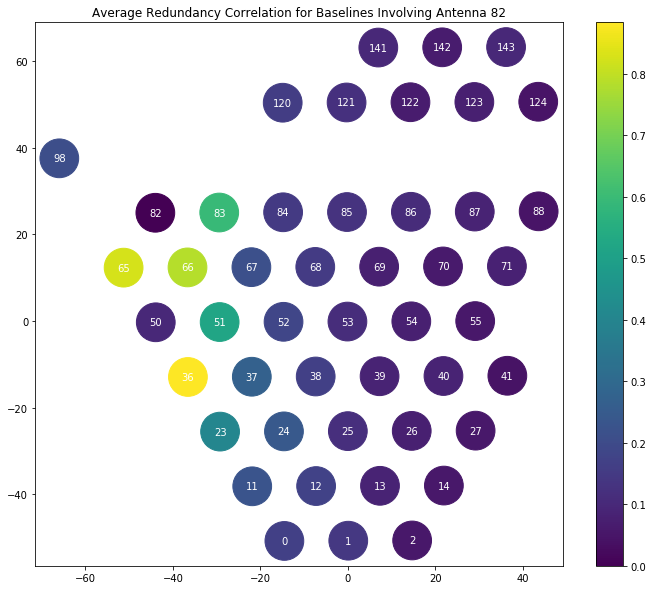

In [41]:

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_82,marker='.',s=6000)

for aa,ant in enumerate(ants):
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 82')
plt.colorbar()
plt.show()


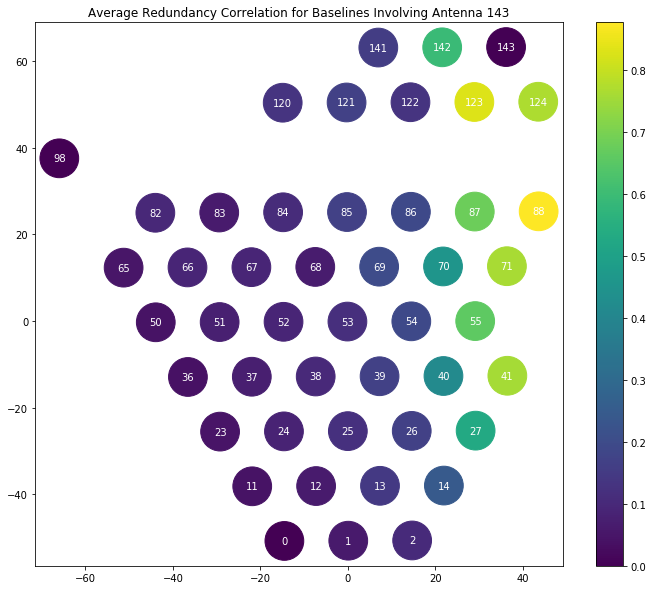

In [42]:

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_143,marker='.',s=6000)

for aa,ant in enumerate(ants):
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 143')
plt.colorbar()
plt.show()
